Link to explaination of variables: https://s3.amazonaws.com/happiness-report/2019/WHR19_Ch2A_Appendix1.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import random
random.seed(16)

In [3]:
data = pd.read_excel('Happy2019.xls', sheet_name='Table2.1')
data.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.799999                      0.718114    0.177889   
1                         51.200001                      0.678896    0.200178   
2                         51.599998                      0.600127    0.134353   
3                         51.919998                      0.495901    0.172137   
4                         52.240002                      0.530935    0.244273   

   Perceptions of corruption  Positive affect  \
0                   0.881686         0.517637   
1                   0.850035         0.583926   
2                   0.706766         0.618265   
3                   0.731109         0.611387   
4                   0.775620         0.710385   

                        ...                         \
0                       ...                          
1                       ...                          
2                       ...                          
3                       ...                          
4                       ...                          

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

   GINI index (World Bank estimate), average 2000-16  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   gini of household income reported in Gallup, by wp5-year  \
0                                                NaN          
1                                           0.441906          
2                                           0.327318          
3                                           0.336764          
4                                           0.344540          

   Most people can be trusted, Gallup  \
0                                 NaN   
1                            0.286315   
2                            0.275833   
3                                 NaN   
4                                 NaN   

   Most people can be trusted, WVS round 1981-1984  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   Most people can be trusted, WVS round 1989-1993  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   Most people can be trusted, WVS round 1994-1998  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   Most people can be trusted, WVS round 1999-2004  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4            

In [3]:
data.shape

(1704, 26)

In [15]:
data.isna().sum()

Country name                                                   0
Year                                                           0
Life Ladder                                                    0
Log GDP per capita                                            28
Social support                                                13
Healthy life expectancy at birth                              28
Freedom to make life choices                                  29
Generosity                                                    82
Perceptions of corruption                                     96
Positive affect                                               19
Negative affect                                               13
Confidence in national government                            174
Democratic Quality                                           146
Delivery Quality                                             145
Standard deviation of ladder by country-year                   0
Standard deviation/Mean o

Drop all of the "most people can be trusted" columns because they contain mostly NaN values.

In [4]:
cols_to_use = data.columns[:-7]

In [5]:
data2 = data[cols_to_use]
data2.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.799999                      0.718114    0.177889   
1                         51.200001                      0.678896    0.200178   
2                         51.599998                      0.600127    0.134353   
3                         51.919998                      0.495901    0.172137   
4                         52.240002                      0.530935    0.244273   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.612072           -1.929690         -1.655084   
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.476600   
1                                           0.391362   
2                                           0.394803   
3                                           0.465942   
4                                           0.475367   

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

   GINI index (World Bank estimate), average 2000-16  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   gini of household income reported in Gallup, by wp5-year  
0                                                NaN         
1                                           0.441906         
2                                           0.327318         
3                                           0.336764         
4                                           0.344540

Create a GINI estimate column that averages the three GINI values together to deal with numerous NaN values.

In [6]:
gini_cols = data2.columns[-3:]
gini = data2[gini_cols]

data2['GINI_estimate'] = gini.mean(axis=1)
data2.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.799999                      0.718114    0.177889   
1                         51.200001                      0.678896    0.200178   
2                         51.599998                      0.600127    0.134353   
3                         51.919998                      0.495901    0.172137   
4                         52.240002                      0.530935    0.244273   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.612072           -1.929690         -1.655084   
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   

   Standard deviation/Mean of ladder by country-year  \
0                                           0.476600   
1                                           0.391362   
2                                           0.394803   
3                                           0.465942   
4                                           0.475367   

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

   GINI index (World Bank estimate), average 2000-16  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   gini of household income reported in Gallup, by wp5-year  GINI_estimate  
0                                                NaN                   NaN  
1                                           0.441906              0.441906  
2                                           0.327318              0.327318  
3                                           0.336764              0.336764  
4                                           0.344540              0.344540

In [7]:
data2.drop(gini_cols, axis=1, inplace=True)
data2.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.799999                      0.718114    0.177889   
1                         51.200001                      0.678896    0.200178   
2                         51.599998                      0.600127    0.134353   
3                         51.919998                      0.495901    0.172137   
4                         52.240002                      0.530935    0.244273   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.612072           -1.929690         -1.655084   
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   

   Standard deviation/Mean of ladder by country-year  GINI_estimate  
0                                           0.476600            NaN  
1                                           0.391362       0.441906  
2                                           0.394803       0.327318  
3                                           0.465942       0.336764  
4                                           0.475367       0.344540

In [202]:
data2.isna().sum()

Country name                                           0
Year                                                   0
Life Ladder                                            0
Log GDP per capita                                    28
Social support                                        13
Healthy life expectancy at birth                      28
Freedom to make life choices                          29
Generosity                                            82
Perceptions of corruption                             96
Positive affect                                       19
Negative affect                                       13
Confidence in national government                    174
Democratic Quality                                   146
Delivery Quality                                     145
Standard deviation of ladder by country-year           0
Standard deviation/Mean of ladder by country-year      0
GINI_estimate                                         40
dtype: int64

In [8]:
rank19 = pd.read_excel('Happy2019.xls', sheet_name='Figure2.6')
rank19.head()

Country  Happiness score  Whisker-high  Whisker-low  \
0      Finland           7.7689      7.829888     7.707912   
1      Denmark           7.6001      7.666658     7.533542   
2       Norway           7.5539      7.615639     7.492160   
3      Iceland           7.4936      7.613283     7.373917   
4  Netherlands           7.4876      7.542098     7.433102   

   Dystopia (1.88) + residual  Explained by: GDP per capita  \
0                    2.713678                      1.340243   
1                    2.392891                      1.383439   
2                    2.240764                      1.487767   
3                    2.400876                      1.380163   
4                    2.392895                      1.396020   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.587276                               0.986145   
1                      1.572595                               0.996019   
2                      1.581548                               1.028123   
3                      1.623651                               1.025653   
4                      1.521903                               0.999314   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.595895                  0.152708   
1                                    0.592356                  0.252320   
2                                    0.603500                  0.271304   
3                                    0.590905                  0.354356   
4                                    0.557075                  0.322440   

   Explained by: Perceptions of corruption  
0                                 0.392913  
1                                 0.410473  
2                                 0.340884  
3                                 0.117980  
4                                 0.297978

In [5]:
rank19.shape

(156, 11)

In [9]:
score2019 = rank19[rank19.columns[:2]]
score2019.head()

Country  Happiness score
0      Finland           7.7689
1      Denmark           7.6001
2       Norway           7.5539
3      Iceland           7.4936
4  Netherlands           7.4876

In [281]:
score2019.tail()

Country  Happiness Score
151                    Rwanda           3.3338
152                  Tanzania           3.2307
153               Afghanistan           3.2033
154  Central African Republic           3.0830
155               South Sudan           2.8526

In [282]:
score2019[-10:]

Country  Happiness Score
146                     Haiti           3.5969
147                  Botswana           3.4884
148                     Syria           3.4619
149                    Malawi           3.4098
150                     Yemen           3.3798
151                    Rwanda           3.3338
152                  Tanzania           3.2307
153               Afghanistan           3.2033
154  Central African Republic           3.0830
155               South Sudan           2.8526

In [10]:
cols = ['Country', 'Happiness Score']
score2019.columns = cols
score2019.head()

Country  Happiness Score
0      Finland           7.7689
1      Denmark           7.6001
2       Norway           7.5539
3      Iceland           7.4936
4  Netherlands           7.4876

In [11]:
rank18 = pd.read_excel('happy2018.xls', sheet_name='Figure2.2')
rank18.head()

Country  Happiness score  Whisker-high  Whisker-low  \
0      Finland           7.6321      7.694913     7.569287   
1       Norway           7.5937      7.657077     7.530323   
2      Denmark           7.5553      7.623292     7.487309   
3      Iceland           7.4952      7.592534     7.397867   
4  Switzerland           7.4873      7.569994     7.404606   

   Dystopia (1.92) + residual  Explained by: GDP per capita  \
0                    2.595186                      1.305095   
1                    2.383242                      1.455627   
2                    2.370179                      1.351153   
3                    2.425990                      1.343301   
4                    2.319529                      1.419727   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.592134                               0.874454   
1                      1.582340                               0.860763   
2                      1.590453                               0.867933   
3                      1.644378                               0.913802   
4                      1.548998                               0.927076   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.680633                  0.191638   
1                                    0.686420                  0.285636   
2                                    0.683251                  0.284392   
3                                    0.676502                  0.353233   
4                                    0.659779                  0.255525   

      ...       Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0     ...               NaN          NaN          NaN          NaN   
1     ...               NaN          NaN          NaN          NaN   
2     ...               NaN          NaN          NaN          NaN   
3     ...               NaN          NaN          NaN          NaN   
4     ...               NaN          NaN          NaN          NaN   

   Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 23  
0      country  
1      Finland  
2          NaN  
3      Denmark  
4      Iceland  

[5 rows x 24 columns]

In [390]:
score2018 = rank18[rank18.columns[:2]]
score2018.head()

Country  Happiness score
0      Finland           7.6321
1       Norway           7.5937
2      Denmark           7.5553
3      Iceland           7.4952
4  Switzerland           7.4873

In [13]:
cols = ['Country', 'Happiness Score']
score2018.columns = cols
score2018.head()

Country  Happiness Score
0      Finland           7.6321
1       Norway           7.5937
2      Denmark           7.5553
3      Iceland           7.4952
4  Switzerland           7.4873

In [14]:
rank17 = pd.read_csv('2017.csv')
rank17.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [15]:
score2017 = rank17[rank17.columns[:3]]
score2017.drop('Happiness.Rank', axis=1, inplace=True)
score2017.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Country  Happiness.Score
0       Norway            7.537
1      Denmark            7.522
2      Iceland            7.504
3  Switzerland            7.494
4      Finland            7.469

In [16]:
cols = ['Country', 'Happiness Score']
score2017.columns = cols
score2017.head()

Country  Happiness Score
0       Norway            7.537
1      Denmark            7.522
2      Iceland            7.504
3  Switzerland            7.494
4      Finland            7.469

In [17]:
rank16 = pd.read_csv('2016.csv')
rank16.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [18]:
score2016 = rank16[rank16.columns[:4]]
score2016.drop(['Happiness Rank', 'Region'], axis=1, inplace=True)
score2016.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Country  Happiness Score
0      Denmark            7.526
1  Switzerland            7.509
2      Iceland            7.501
3       Norway            7.498
4      Finland            7.413

In [19]:
rank15 = pd.read_csv('2015.csv')
rank15.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [20]:
score2015 = rank15[rank15.columns[:4]]
score2015.drop(['Happiness Rank', 'Region'], axis=1, inplace=True)
score2015.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Country  Happiness Score
0  Switzerland            7.587
1      Iceland            7.561
2      Denmark            7.527
3       Norway            7.522
4       Canada            7.427

In [34]:
year_df = data2.loc[data2.Year == 2014]
year_df.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
6   Afghanistan  2014     3.130896            7.516955        0.525568   
17      Albania  2014     4.813763            9.278104        0.625587   
25      Algeria  2014     6.354898            9.509210        0.818189   
32       Angola  2014     3.794838            8.741481        0.754615   
41    Argentina  2014     6.671114            9.841482        0.917870   

    Healthy life expectancy at birth  Freedom to make life choices  \
6                          52.880001                      0.508514   
17                         67.519997                      0.734648   
25                         65.139999                           NaN   
32                         54.599998                      0.374542   
41                         68.019997                      0.745058   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
6     0.113184                   0.871242         0.531691         0.374861   
17   -0.028162                   0.882704         0.684911         0.334543   
25         NaN                        NaN         0.625905         0.176866   
32   -0.157062                   0.834076         0.578517         0.367864   
41   -0.160449                   0.854192         0.857124         0.237913   

    Confidence in national government  Democratic Quality  Delivery Quality  \
6                            0.409048           -1.773257         -1.312503   
17                           0.498786            0.314873         -0.187407   
25                                NaN           -1.002867         -0.783428   
32                           0.572346           -0.739363         -1.168539   
41                           0.408961            0.170099         -0.665262   

    Standard deviation of ladder by country-year  \
6                                       1.395396   
17                                      2.660069   
25                                      1.632461   
32                                      2.196711   
41                                      2.129256   

    Standard deviation/Mean of ladder by country-year  GINI_estimate  
6                                            0.445686       0.413974  
17                                           0.552597       0.360234  
25                                           0.256882       0.375746  
32                                           0.578868       0.457099  
41                                           0.319175       0.395014

In [35]:
year_df.shape

(145, 17)

In [36]:
year_df['happy_score'] = np.zeros(145)

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
year_df.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
7   Afghanistan  2015     3.982855            7.500539        0.528597   
18      Albania  2015     4.606651            9.302960        0.639356   
42    Argentina  2015     6.697131            9.858329        0.926492   
55      Armenia  2015     4.348320            9.011394        0.722551   
67    Australia  2015     7.309061           10.690199        0.951862   

    Healthy life expectancy at birth  Freedom to make life choices  \
7                          53.200001                      0.388928   
18                         67.800003                      0.703851   
42                         68.199997                      0.881224   
55                         66.000000                      0.551027   
67                         72.699997                      0.921871   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
7     0.089091                   0.880638         0.553553         0.339276   
18   -0.084411                   0.884793         0.688370         0.350427   
42   -0.170244                   0.850906         0.858544         0.305355   
55   -0.189388                   0.901462         0.594143         0.437948   
67    0.323258                   0.356554         0.790050         0.209637   

    Confidence in national government  Democratic Quality  Delivery Quality  \
7                            0.260557           -1.844364         -1.291594   
18                           0.506978            0.251629         -0.152544   
42                           0.378169            0.213269         -0.576051   
55                           0.170928           -0.394302         -0.210142   
67                           0.478557            1.120240          1.765202   

    Standard deviation of ladder by country-year  \
7                                       2.160618   
18                                      2.729001   
42                                      1.953587   
55                                      2.237644   
67                                      1.686918   

    Standard deviation/Mean of ladder by country-year  GINI_estimate  \
7                                            0.542480       0.596918   
18                                           0.592405       0.362938   
42                                           0.291705       0.403592   
55                                           0.514600       0.340288   
67                                           0.230798       0.379439   

    happy_score  
7           0.0  
18          0.0  
42          0.0  
55          0.0  
67          0.0

In [23]:
# happy = []

# for country in year_df['Country name'].unique():
#     score = score2015.loc[score2015['Country'] == country]
#     h_score = score['Happiness Score'].item()
#     happy.append(h_score)

# len(happy)

In [24]:
# happy = []

# for country in year_df['Country name'].unique()[143]:
#     score = score2015.loc[score2015['Country'] == country]
#     h_score = score['Happiness Score'].item()
#     happy.append(h_score)

# len(happy)

In [117]:
score2015.iloc[150]

Country            Ivory Coast
Happiness Score          3.655
Name: 150, dtype: object

In [25]:
# score2015['Happiness Score'] = score2015['Happiness Score'].astype('float', inplace=True)

In [71]:
score2015.iloc[115]

Country            Liberia
Happiness Score      4.571
Name: 115, dtype: object

In [130]:
test = score2015.iloc[:140]
test.head()

Country  Happiness Score
0  Switzerland            7.587
1      Iceland            7.561
2      Denmark            7.527
3       Norway            7.522
4       Canada            7.427

In [41]:
score2015.isna().sum()

Country            0
Happiness Score    0
dtype: int64

In [42]:
score2015.describe()

Happiness Score
count       158.000000
mean          5.375734
std           1.145010
min           2.839000
25%           4.526000
50%           5.232500
75%           6.243750
max           7.587000

In [119]:
score2015['Country'].nunique()

158

In [120]:
len(score2015['Country'])

158

In [37]:
#def add_happy(data_df, year, score_df):
    

for country in score2015['Country'].unique():
    if country in year_df['Country name'].unique():
        score = score2015.loc[score2015['Country'] == country]
        h_score = score['Happiness Score'].item()
        year_df.loc[(year_df['Country name'] == country), 'happy_score'] = h_score
    else:
        continue
    
year_df.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
6   Afghanistan  2014     3.130896            7.516955        0.525568   
17      Albania  2014     4.813763            9.278104        0.625587   
25      Algeria  2014     6.354898            9.509210        0.818189   
32       Angola  2014     3.794838            8.741481        0.754615   
41    Argentina  2014     6.671114            9.841482        0.917870   

    Healthy life expectancy at birth  Freedom to make life choices  \
6                          52.880001                      0.508514   
17                         67.519997                      0.734648   
25                         65.139999                           NaN   
32                         54.599998                      0.374542   
41                         68.019997                      0.745058   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
6     0.113184                   0.871242         0.531691         0.374861   
17   -0.028162                   0.882704         0.684911         0.334543   
25         NaN                        NaN         0.625905         0.176866   
32   -0.157062                   0.834076         0.578517         0.367864   
41   -0.160449                   0.854192         0.857124         0.237913   

    Confidence in national government  Democratic Quality  Delivery Quality  \
6                            0.409048           -1.773257         -1.312503   
17                           0.498786            0.314873         -0.187407   
25                                NaN           -1.002867         -0.783428   
32                           0.572346           -0.739363         -1.168539   
41                           0.408961            0.170099         -0.665262   

    Standard deviation of ladder by country-year  \
6                                       1.395396   
17                                      2.660069   
25                                      1.632461   
32                                      2.196711   
41                                      2.129256   

    Standard deviation/Mean of ladder by country-year  GINI_estimate  \
6                                            0.445686       0.413974   
17                                           0.552597       0.360234   
25                                           0.256882       0.375746   
32                                           0.578868       0.457099   
41                                           0.319175       0.395014   

    happy_score  
6         3.575  
17        4.959  
25        5.605  
32        4.033  
41        6.574

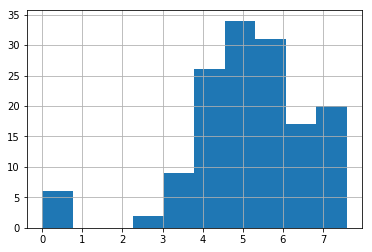

In [38]:
year_df['happy_score'].hist()
plt.show()

In [135]:
year_df['happy_score'].describe()

count    143.000000
mean       5.302965
std        1.383483
min        0.000000
25%        4.515500
50%        5.212000
75%        6.298500
max        7.587000
Name: happy_score, dtype: float64

In [39]:
zeros14 = year_df.loc[year_df['happy_score'] == 0]
zeros14

Country name  Year  Life Ladder  Log GDP per capita  \
143                      Belize  2014     5.955647            8.987144   
621   Hong Kong S.A.R. of China  2014     5.458051           10.874066   
1049                    Namibia  2014     4.573991            9.171329   
1362                    Somalia  2014     5.528273                 NaN   
1395                South Sudan  2014     3.831992            7.568317   
1466   Taiwan Province of China  2014     6.363497           10.699361   

      Social support  Healthy life expectancy at birth  \
143         0.756932                         62.220001   
621         0.833558                         75.731361   
1049        0.762784                         55.160000   
1362        0.610836                         49.599998   
1395        0.545118                         49.840000   
1466        0.870012                               NaN   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
143                       0.873569    0.004827                   0.782105   
621                       0.843082    0.212896                   0.422960   
1049                      0.849355   -0.189335                   0.790228   
1362                      0.873879         NaN                   0.456470   
1395                      0.567259    0.024644                   0.741541   
1466                      0.692900    0.083981                   0.865741   

      Positive affect  Negative affect  Confidence in national government  \
143          0.754977         0.281604                           0.384267   
621          0.683968         0.242868                           0.457823   
1049         0.748637         0.238961                           0.779544   
1362         0.834454         0.207215                           0.625451   
1395         0.614024         0.428320                           0.446467   
1466         0.848841         0.108366                           0.270723   

      Democratic Quality  Delivery Quality  \
143             0.284336         -0.524305   
621             0.844464          1.842695   
1049            0.581021          0.132854   
1362           -2.315310         -2.144974   
1395           -2.132233         -1.787121   
1466            0.824068          1.166719   

      Standard deviation of ladder by country-year  \
143                                       2.455257   
621                                       1.811950   
1049                                      2.724568   
1362                                      2.604818   
1395                                      3.043643   
1466                                      1.806700   

      Standard deviation/Mean of ladder by country-year  GINI_estimate  \
143                                            0.412257       0.446026   
621                                            0.331978       0.550612   
1049                                           0.595665       0.695727   
1362                                           0.471181       0.619423   
1395                                           0.794272       0.701973   
1466                                           0.283916       0.372486   

      happy_score  
143           0.0  
621           0.0  
1049          0.0  
1362          0.0  
1395          0.0  
1466          0.0

In [64]:
score2015['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [21]:
score2015.loc[(score2015['Country'] == 'Taiwan'), 'Country'] = 'Taiwan Province of China'
score2015.loc[(score2015['Country'] == 'Hong Kong'), 'Country'] = 'Hong Kong S.A.R. of China'
score2015.loc[(score2015['Country'] == 'Somaliland region'), 'Country'] = 'Somalia'
# score2015.loc[(score2015['Country'] == 'Sudan'), 'Country'] = 'South Sudan'

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [66]:
countries = data2['Country name'].unique()
s_countries = [c for c in countries if c.startswith('S') == True]
s_countries

['Saudi Arabia',
 'Senegal',
 'Serbia',
 'Sierra Leone',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'Somalia',
 'Somaliland region',
 'South Africa',
 'South Korea',
 'South Sudan',
 'Spain',
 'Sri Lanka',
 'Sudan',
 'Suriname',
 'Swaziland',
 'Sweden',
 'Switzerland',
 'Syria']

In [41]:
year15_df = data2.loc[data2.Year == 2015]
year15_df['happy_score'] = np.zeros(143)
#year15_df.shape
year15_df.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
7   Afghanistan  2015     3.982855            7.500539        0.528597   
18      Albania  2015     4.606651            9.302960        0.639356   
42    Argentina  2015     6.697131            9.858329        0.926492   
55      Armenia  2015     4.348320            9.011394        0.722551   
67    Australia  2015     7.309061           10.690199        0.951862   

    Healthy life expectancy at birth  Freedom to make life choices  \
7                          53.200001                      0.388928   
18                         67.800003                      0.703851   
42                         68.199997                      0.881224   
55                         66.000000                      0.551027   
67                         72.699997                      0.921871   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
7     0.089091                   0.880638         0.553553         0.339276   
18   -0.084411                   0.884793         0.688370         0.350427   
42   -0.170244                   0.850906         0.858544         0.305355   
55   -0.189388                   0.901462         0.594143         0.437948   
67    0.323258                   0.356554         0.790050         0.209637   

    Confidence in national government  Democratic Quality  Delivery Quality  \
7                            0.260557           -1.844364         -1.291594   
18                           0.506978            0.251629         -0.152544   
42                           0.378169            0.213269         -0.576051   
55                           0.170928           -0.394302         -0.210142   
67                           0.478557            1.120240          1.765202   

    Standard deviation of ladder by country-year  \
7                                       2.160618   
18                                      2.729001   
42                                      1.953587   
55                                      2.237644   
67                                      1.686918   

    Standard deviation/Mean of ladder by country-year  GINI_estimate  \
7                                            0.542480       0.596918   
18                                           0.592405       0.362938   
42                                           0.291705       0.403592   
55                                           0.514600       0.340288   
67                                           0.230798       0.379439   

    happy_score  
7           0.0  
18          0.0  
42          0.0  
55          0.0  
67          0.0

In [42]:
for country in score2016['Country'].unique():
    if country in year15_df['Country name'].unique():
        score = score2016.loc[score2016['Country'] == country]
        h_score = score['Happiness Score'].item()
        year15_df.loc[(year15_df['Country name'] == country), 'happy_score'] = h_score
    else:
        continue

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [43]:
zeros15 = year15_df.loc[year15_df['happy_score'] == 0]
zeros15

Country name  Year  Life Ladder  Log GDP per capita  \
1038                Mozambique  2015     4.549767            7.019496   
1467  Taiwan Province of China  2015     6.450088                 NaN   

      Social support  Healthy life expectancy at birth  \
1038        0.665858                         51.200001   
1467        0.885389                               NaN   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
1038                      0.813229    0.093729                   0.631573   
1467                      0.700810         NaN                   0.857195   

      Positive affect  Negative affect  Confidence in national government  \
1038         0.564461         0.339584                           0.706728   
1467         0.831987         0.129349                           0.270260   

      Democratic Quality  Delivery Quality  \
1038           -0.391963         -0.711075   
1467            0.909463          1.169457   

      Standard deviation of ladder by country-year  \
1038                                      3.016000   
1467                                      1.828002   

      Standard deviation/Mean of ladder by country-year  GINI_estimate  \
1038                                           0.662891       0.669065   
1467                                           0.283407       0.383504   

      happy_score  
1038          0.0  
1467          0.0

In [62]:
score2016['Country'].unique()

array(['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Puerto Rico', 'Germany',
       'Brazil', 'Belgium', 'Ireland', 'Luxembourg', 'Mexico',
       'Singapore', 'United Kingdom', 'Chile', 'Panama', 'Argentina',
       'Czech Republic', 'United Arab Emirates', 'Uruguay', 'Malta',
       'Colombia', 'France', 'Thailand', 'Saudi Arabia', 'Taiwan',
       'Qatar', 'Spain', 'Algeria', 'Guatemala', 'Suriname', 'Kuwait',
       'Bahrain', 'Trinidad and Tobago', 'Venezuela', 'Slovakia',
       'El Salvador', 'Malaysia', 'Nicaragua', 'Uzbekistan', 'Italy',
       'Ecuador', 'Belize', 'Japan', 'Kazakhstan', 'Moldova', 'Russia',
       'Poland', 'South Korea', 'Bolivia', 'Lithuania', 'Belarus',
       'North Cyprus', 'Slovenia', 'Peru', 'Turkmenistan', 'Mauritius',
       'Libya', 'Latvia', 'Cyprus', 'Paraguay', 'Romania', 'Estonia',
       'Jamaica', 'Croa

In [22]:
score2016.loc[(score2016['Country'] == 'Taiwan'), 'Country'] = 'Taiwan Province of China'

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [45]:
year16_df = data2.loc[data2.Year == 2016]
year16_df['happy_score'] = np.zeros(142)
#year16_df.shape
year16_df.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
8   Afghanistan  2016     4.220169            7.497038        0.559072   
19      Albania  2016     4.511101            9.337532        0.638411   
26      Algeria  2016     5.340854            9.541166        0.748588   
43    Argentina  2016     6.427221            9.830088        0.882819   
56      Armenia  2016     4.325472            9.010698        0.709218   

    Healthy life expectancy at birth  Freedom to make life choices  \
8                          53.000000                      0.522566   
19                         68.099998                      0.729819   
26                         65.500000                           NaN   
43                         68.400002                      0.847702   
56                         66.300003                      0.610987   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
8     0.051365                   0.793246         0.564953         0.348332   
19   -0.020687                   0.901071         0.675244         0.321706   
26         NaN                        NaN         0.660510         0.377112   
43   -0.188304                   0.850924         0.841907         0.311646   
56   -0.157249                   0.921421         0.593600         0.437228   

    Confidence in national government  Democratic Quality  Delivery Quality  \
8                            0.324990           -1.855426         -1.392713   
19                           0.400910            0.257292         -0.134950   
26                                NaN           -0.976652         -0.815911   
43                           0.419562            0.348582         -0.243653   
56                           0.184713           -0.620788         -0.147838   

    Standard deviation of ladder by country-year  \
8                                       1.796219   
19                                      2.646668   
26                                      2.114553   
43                                      2.127109   
56                                      2.126364   

    Standard deviation/Mean of ladder by country-year  GINI_estimate  \
8                                            0.425627       0.418629   
19                                           0.586701       0.359895   
26                                           0.395920       0.440308   
43                                           0.330953       0.405669   
56                                           0.491591       0.341938   

    happy_score  
8           0.0  
19          0.0  
26          0.0  
43          0.0  
56          0.0

In [46]:
for country in score2017['Country'].unique():
    if country in year16_df['Country name'].unique():
        score = score2017.loc[score2017['Country'] == country]
        h_score = score['Happiness Score'].item()
        year16_df.loc[(year16_df['Country name'] == country), 'happy_score'] = h_score
    else:
        continue
        
zeros16 = year16_df.loc[year16_df['happy_score'] == 0]
zeros16

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country name  Year  Life Ladder  Log GDP per capita  \
622  Hong Kong S.A.R. of China  2016     5.498421           10.904357   

     Social support  Healthy life expectancy at birth  \
622        0.832078                         75.953506   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
622                      0.799743    0.089243                   0.402813   

     Positive affect  Negative affect  Confidence in national government  \
622         0.664093         0.213115                            0.44961   

     Democratic Quality  Delivery Quality  \
622            0.563998           1.82022   

     Standard deviation of ladder by country-year  \
622                                      1.819238   

     Standard deviation/Mean of ladder by country-year  GINI_estimate  \
622                                           0.330866       0.513229   

     happy_score  
622          0.0

In [59]:
score2017['Country'].unique()

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Czech Republic', 'Argentina',
       'Mexico', 'Singapore', 'Malta', 'Uruguay', 'Guatemala', 'Panama',
       'France', 'Thailand', 'Taiwan Province of China', 'Spain', 'Qatar',
       'Colombia', 'Saudi Arabia', 'Trinidad and Tobago', 'Kuwait',
       'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador',
       'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Belize',
       'Japan', 'Lithuania', 'Algeria', 'Latvia', 'South Korea',
       'Moldova', 'Romania', 'Bolivia', 'Turkmenistan', 'Kazakhstan',
       'North Cyprus', 'Slovenia', 'Peru', 'Mauritius', 'Cyprus',
       'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay',
       'Hong Kong S.A.R., China', '

In [23]:
score2017.loc[(score2017['Country'] == 'Hong Kong S.A.R., China'), 'Country'] = 'Hong Kong S.A.R. of China'

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [48]:
year17_df = data2.loc[data2.Year == 2017]
year17_df['happy_score'] = np.zeros(147)
#year17_df.shape
year17_df.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
9   Afghanistan  2017     2.661718            7.497755        0.490880   
20      Albania  2017     4.639548            9.376145        0.637698   
27      Algeria  2017     5.248912            9.540639        0.806754   
44    Argentina  2017     6.039330            9.848709        0.906699   
57      Armenia  2017     4.287736            9.081095        0.697925   

    Healthy life expectancy at birth  Freedom to make life choices  \
9                          52.799999                      0.427011   
20                         68.400002                      0.749611   
27                         65.699997                      0.436670   
44                         68.599998                      0.831966   
57                         66.599998                      0.613697   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
9    -0.112198                   0.954393         0.496349         0.371326   
20   -0.032643                   0.876135         0.669241         0.333884   
27   -0.191522                   0.699774         0.641980         0.288710   
44   -0.182600                   0.841052         0.809423         0.291717   
57   -0.133958                   0.864683         0.625014         0.437149   

    Confidence in national government  Democratic Quality  Delivery Quality  \
9                            0.261179           -1.886566         -1.437808   
20                           0.457738            0.299945         -0.130315   
27                                NaN           -0.927691         -0.816839   
44                           0.305430            0.351304         -0.158056   
57                           0.246901           -0.633139         -0.132939   

    Standard deviation of ladder by country-year  \
9                                       1.454051   
20                                      2.682105   
27                                      2.039765   
44                                      2.409329   
57                                      2.325379   

    Standard deviation/Mean of ladder by country-year  GINI_estimate  \
9                                            0.546283       0.286599   
20                                           0.578096       0.356869   
27                                           0.388607       0.401778   
44                                           0.398940       0.427557   
57                                           0.542333       0.399063   

    happy_score  
9           0.0  
20          0.0  
27          0.0  
44          0.0  
57          0.0

In [50]:
for country in score2018['Country'].unique():
    if country in year17_df['Country name'].unique():
        score = score2018.loc[score2018['Country'] == country]
        h_score = score['Happiness Score'].item()
        year17_df.loc[(year17_df['Country name'] == country), 'happy_score'] = h_score
    else:
        continue
        
zeros17 = year17_df.loc[year17_df['happy_score'] == 0]
zeros17

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country name  Year  Life Ladder  Log GDP per capita  \
517                      Gambia  2017     4.117939            7.353573   
623   Hong Kong S.A.R. of China  2017     5.362475           10.934087   
1521        Trinidad and Tobago  2017     6.191860           10.266848   

      Social support  Healthy life expectancy at birth  \
517         0.697002                         54.700001   
623         0.831066                         75.907318   
1521        0.916029                         63.500000   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
517                       0.812326    0.126380                   0.571616   
623                       0.830657    0.128979                   0.415810   
1521                      0.859140   -0.004833                   0.911336   

      Positive affect  Negative affect  Confidence in national government  \
517          0.838287         0.277247                           0.796493   
623          0.639533         0.200593                           0.545041   
1521         0.846467         0.248099                           0.272541   

      Democratic Quality  Delivery Quality  \
517            -0.427905         -0.552332   
623             0.637072          1.849664   
1521            0.420911         -0.046981   

      Standard deviation of ladder by country-year  \
517                                       2.480231   
623                                       1.784559   
1521                                      2.276677   

      Standard deviation/Mean of ladder by country-year  GINI_estimate  \
517                                            0.602299       0.492588   
623                                            0.332787       0.471278   
1521                                           0.367689       0.415465   

      happy_score  
517           0.0  
623           0.0  
1521          0.0

In [56]:
score2018.Country.unique()

array(['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Austria', 'Costa Rica', 'Ireland', 'Germany', 'Belgium',
       'Luxembourg', 'United States', 'United Kingdom',
       'United Arab Emirates', 'Czech Republic', 'Malta', 'France',
       'Mexico', 'Chile', 'Taiwan Province of China', 'Panama', 'Brazil',
       'Argentina', 'Guatemala', 'Uruguay', 'Qatar', 'Saudi Arabia',
       'Singapore', 'Malaysia', 'Spain', 'Colombia', 'Trinidad & Tobago',
       'Slovakia', 'El Salvador', 'Nicaragua', 'Poland', 'Bahrain',
       'Uzbekistan', 'Kuwait', 'Thailand', 'Italy', 'Ecuador', 'Belize',
       'Lithuania', 'Slovenia', 'Romania', 'Latvia', 'Japan', 'Mauritius',
       'Jamaica', 'South Korea', 'Northern Cyprus', 'Russia',
       'Kazakhstan', 'Cyprus', 'Bolivia', 'Estonia', 'Paraguay', 'Peru',
       'Kosovo', 'Moldova', 'Turkmenistan', 'Hungary', 'Libya',
       'Philippines', 'Honduras', 

In [24]:
score2018.loc[(score2018['Country'] == 'Hong Kong SAR, China'), 'Country'] = 'Hong Kong S.A.R. of China'
score2018.loc[(score2018['Country'] == 'Trinidad & Tobago'), 'Country'] = 'Trinidad and Tobago'

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
year18_df = data2.loc[data2.Year == 2018]
year18_df['happy_score'] = np.zeros(136)
#year18_df.shape
year18_df.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
10  Afghanistan  2018     2.694303            7.494588        0.507516   
21      Albania  2018     5.004403            9.412399        0.683592   
28      Algeria  2018     5.043086            9.557952        0.798651   
45    Argentina  2018     5.792797            9.809972        0.899912   
58      Armenia  2018     5.062449            9.119424        0.814449   

    Healthy life expectancy at birth  Freedom to make life choices  \
10                         52.599998                      0.373536   
21                         68.699997                      0.824212   
28                         65.900002                      0.583381   
45                         68.800003                      0.845895   
58                         66.900002                      0.807644   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
10   -0.084888                   0.927606         0.424125         0.404904   
21    0.005385                   0.899129         0.713300         0.318997   
28   -0.172413                   0.758704         0.591043         0.292946   
45   -0.206937                   0.855255         0.820310         0.320502   
58   -0.149109                   0.676826         0.581488         0.454840   

    Confidence in national government  Democratic Quality  Delivery Quality  \
10                           0.364666                 NaN               NaN   
21                           0.435338                 NaN               NaN   
28                                NaN                 NaN               NaN   
45                           0.261352                 NaN               NaN   
58                           0.670828                 NaN               NaN   

    Standard deviation of ladder by country-year  \
10                                      1.408344   
21                                      2.640531   
28                                      1.973943   
45                                      2.472559   
58                                      2.102111   

    Standard deviation/Mean of ladder by country-year  GINI_estimate  \
10                                           0.522712       0.290681   
21                                           0.527642       0.379712   
28                                           0.391416       0.471936   
45                                           0.426833       0.433147   
58                                           0.415236       0.362827   

    happy_score  
10          0.0  
21          0.0  
28          0.0  
45          0.0  
58          0.0

In [53]:
for country in score2019['Country'].unique():
    if country in year18_df['Country name'].unique():
        score = score2019.loc[score2019['Country'] == country]
        h_score = score['Happiness Score'].item()
        year18_df.loc[(year18_df['Country name'] == country), 'happy_score'] = h_score
    else:
        continue
        
zeros18 = year18_df.loc[year18_df['happy_score'] == 0]
zeros18

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Empty DataFrame
Columns: [Country name, Year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, Confidence in national government, Democratic Quality, Delivery Quality, Standard deviation of ladder by country-year, Standard deviation/Mean of ladder by country-year, GINI_estimate, happy_score]
Index: []

In [25]:
def add_happy(data_df, year, score_df):
    '''Add the happiness scores from the specified yearly report to the main dataset for each country.
    
    data_df: main dataframe in which to add the happiness scores
    year: numerical year corresponding to the happiness score, integer
    score_df: dataframe containing the happiness scores from the specified year
    '''

    for country in score_df['Country'].unique():
        if country in data_df['Country name'].unique():
            score = score_df.loc[score_df['Country'] == country]
            h_score = score['Happiness Score'].item()
            data_df.loc[(data_df['Country name'] == country) & (data_df['Year'] == year), 'happy_score'] = h_score
        else:
            continue

In [143]:
data2.shape

(1704, 17)

In [26]:
data2['happy_score'] = np.zeros(1704)

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
add_happy(data2, 2014, score2015)
data2.head(15)

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0   Afghanistan  2008     3.723590            7.168690        0.450662   
1   Afghanistan  2009     4.401778            7.333790        0.552308   
2   Afghanistan  2010     4.758381            7.386629        0.539075   
3   Afghanistan  2011     3.831719            7.415019        0.521104   
4   Afghanistan  2012     3.782938            7.517126        0.520637   
5   Afghanistan  2013     3.572100            7.522238        0.483552   
6   Afghanistan  2014     3.130896            7.516955        0.525568   
7   Afghanistan  2015     3.982855            7.500539        0.528597   
8   Afghanistan  2016     4.220169            7.497038        0.559072   
9   Afghanistan  2017     2.661718            7.497755        0.490880   
10  Afghanistan  2018     2.694303            7.494588        0.507516   
11      Albania  2007     4.634252            9.077331        0.821372   
12      Albania  2009     5.485470            9.161638        0.833047   
13      Albania  2010     5.268937            9.203032        0.733152   
14      Albania  2011     5.867422            9.230904        0.759434   

    Healthy life expectancy at birth  Freedom to make life choices  \
0                          50.799999                      0.718114   
1                          51.200001                      0.678896   
2                          51.599998                      0.600127   
3                          51.919998                      0.495901   
4                          52.240002                      0.530935   
5                          52.560001                      0.577955   
6                          52.880001                      0.508514   
7                          53.200001                      0.388928   
8                          53.000000                      0.522566   
9                          52.799999                      0.427011   
10                         52.599998                      0.373536   
11                         65.800003                      0.528605   
12                         66.199997                      0.525223   
13                         66.400002                      0.568958   
14                         66.680000                      0.487496   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0     0.177889                   0.881686         0.517637         0.258195   
1     0.200178                   0.850035         0.583926         0.237092   
2     0.134353                   0.706766         0.618265         0.275324   
3     0.172137                   0.731109         0.611387         0.267175   
4     0.244273                   0.775620         0.710385         0.267919   
5     0.070403                   0.823204         0.620585         0.273328   
6     0.113184                   0.871242         0.531691         0.374861   
7     0.089091                   0.880638         0.553553         0.339276   
8     0.051365                   0.793246         0.564953         0.348332   
9    -0.112198                   0.954393         0.496349         0.371326   
10   -0.084888                   0.927606         0.424125         0.404904   
11   -0.014393                   0.874700         0.552678         0.246335   
12   -0.160855                   0.863665         0.640024         0.279257   
13   -0.175367                   0.726262         0.647908         0.300060   
14   -0.207943                   0.877003         0.627659         0.256577   

    Confidence in national government  Democratic Quality  Delivery Quality  \
0                            0.612072           -1.929690         -1.655084   
1                            0.611545           -2.044093         -1.635025   
2                            0.299357           -1.991810         -1.617176   
3                            0.307386           -1.919018         -1.616221   
4                            0.435440

In [28]:
add_happy(data2, 2015, score2016)
data2.head(20)

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0   Afghanistan  2008     3.723590            7.168690        0.450662   
1   Afghanistan  2009     4.401778            7.333790        0.552308   
2   Afghanistan  2010     4.758381            7.386629        0.539075   
3   Afghanistan  2011     3.831719            7.415019        0.521104   
4   Afghanistan  2012     3.782938            7.517126        0.520637   
5   Afghanistan  2013     3.572100            7.522238        0.483552   
6   Afghanistan  2014     3.130896            7.516955        0.525568   
7   Afghanistan  2015     3.982855            7.500539        0.528597   
8   Afghanistan  2016     4.220169            7.497038        0.559072   
9   Afghanistan  2017     2.661718            7.497755        0.490880   
10  Afghanistan  2018     2.694303            7.494588        0.507516   
11      Albania  2007     4.634252            9.077331        0.821372   
12      Albania  2009     5.485470            9.161638        0.833047   
13      Albania  2010     5.268937            9.203032        0.733152   
14      Albania  2011     5.867422            9.230904        0.759434   
15      Albania  2012     5.510124            9.246655        0.784502   
16      Albania  2013     4.550648            9.258445        0.759477   
17      Albania  2014     4.813763            9.278104        0.625587   
18      Albania  2015     4.606651            9.302960        0.639356   
19      Albania  2016     4.511101            9.337532        0.638411   

    Healthy life expectancy at birth  Freedom to make life choices  \
0                          50.799999                      0.718114   
1                          51.200001                      0.678896   
2                          51.599998                      0.600127   
3                          51.919998                      0.495901   
4                          52.240002                      0.530935   
5                          52.560001                      0.577955   
6                          52.880001                      0.508514   
7                          53.200001                      0.388928   
8                          53.000000                      0.522566   
9                          52.799999                      0.427011   
10                         52.599998                      0.373536   
11                         65.800003                      0.528605   
12                         66.199997                      0.525223   
13                         66.400002                      0.568958   
14                         66.680000                      0.487496   
15                         66.959999                      0.601512   
16                         67.239998                      0.631830   
17                         67.519997                      0.734648   
18                         67.800003                      0.703851   
19                         68.099998                      0.729819   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0     0.177889                   0.881686         0.517637         0.258195   
1     0.200178                   0.850035         0.583926         0.237092   
2     0.134353                   0.706766         0.618265         0.275324   
3     0.172137                   0.731109         0.611387         0.267175   
4     0.244273                   0.775620         0.710385         0.267919   
5     0.070403                   0.823204         0.620585         0.273328   
6     0.113184                   0.871242         0.531691         0.374861   
7     0.089091                   0.880638         0.553553         0.339276   
8     0.051365                   0.793246         0.564953         0.348332   
9    -0.112198                   0.954393         0.496349         0.371326   
10   -0.084888                   0.927606         0.424125         0.404904   
11   -0.014393               

In [29]:
add_happy(data2, 2016, score2017)
data2.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.799999                      0.718114    0.177889   
1                         51.200001                      0.678896    0.200178   
2                         51.599998                      0.600127    0.134353   
3                         51.919998                      0.495901    0.172137   
4                         52.240002                      0.530935    0.244273   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.612072           -1.929690         -1.655084   
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   

   Standard deviation/Mean of ladder by country-year  GINI_estimate  \
0                                           0.476600            NaN   
1                                           0.391362       0.441906   
2                                           0.394803       0.327318   
3                                           0.465942       0.336764   
4                                           0.475367       0.344540   

   happy_score  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [30]:
add_happy(data2, 2017, score2018)
data2.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.799999                      0.718114    0.177889   
1                         51.200001                      0.678896    0.200178   
2                         51.599998                      0.600127    0.134353   
3                         51.919998                      0.495901    0.172137   
4                         52.240002                      0.530935    0.244273   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.612072           -1.929690         -1.655084   
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   

   Standard deviation/Mean of ladder by country-year  GINI_estimate  \
0                                           0.476600            NaN   
1                                           0.391362       0.441906   
2                                           0.394803       0.327318   
3                                           0.465942       0.336764   
4                                           0.475367       0.344540   

   happy_score  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [31]:
add_happy(data2, 2018, score2019)
data2.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.799999                      0.718114    0.177889   
1                         51.200001                      0.678896    0.200178   
2                         51.599998                      0.600127    0.134353   
3                         51.919998                      0.495901    0.172137   
4                         52.240002                      0.530935    0.244273   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.881686         0.517637         0.258195   
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.612072           -1.929690         -1.655084   
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  \
0                                      1.774662   
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   

   Standard deviation/Mean of ladder by country-year  GINI_estimate  \
0                                           0.476600            NaN   
1                                           0.391362       0.441906   
2                                           0.394803       0.327318   
3                                           0.465942       0.336764   
4                                           0.475367       0.344540   

   happy_score  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

### Dealing with NaN values

I want to keep as much of the data that has labels (actual happiness scores), but I am willing to drop all of the rows in the unlabeled data with NaN values.

In [32]:
data2.isna().sum()

Country name                                           0
Year                                                   0
Life Ladder                                            0
Log GDP per capita                                    28
Social support                                        13
Healthy life expectancy at birth                      28
Freedom to make life choices                          29
Generosity                                            82
Perceptions of corruption                             96
Positive affect                                       19
Negative affect                                       13
Confidence in national government                    174
Democratic Quality                                   146
Delivery Quality                                     145
Standard deviation of ladder by country-year           0
Standard deviation/Mean of ladder by country-year      0
GINI_estimate                                         40
happy_score                    

In [33]:
labeled_data = data2.loc[data2['happy_score'] != 0]
labeled_data.shape

(708, 18)

In [34]:
labeled_data.isna().sum()

Country name                                           0
Year                                                   0
Life Ladder                                            0
Log GDP per capita                                    22
Social support                                         5
Healthy life expectancy at birth                      15
Freedom to make life choices                          13
Generosity                                            30
Perceptions of corruption                             48
Positive affect                                        7
Negative affect                                        6
Confidence in national government                     63
Democratic Quality                                   139
Delivery Quality                                     139
Standard deviation of ladder by country-year           0
Standard deviation/Mean of ladder by country-year      0
GINI_estimate                                          0
happy_score                    

In [192]:
nan_check = []
for country in labeled_data['Country name'].unique():
    country_df = labeled_data.loc[labeled_data['Country name'] == country]
    sum_nan = sum(country_df.isna().sum())
    nan_check.append([country, sum_nan])
    
sorted(nan_check, key=lambda x: x[1], reverse=True)[:10]

[['United Arab Emirates', 22],
 ['Vietnam', 22],
 ['China', 20],
 ['North Cyprus', 20],
 ['Jordan', 19],
 ['Bahrain', 17],
 ['Kuwait', 17],
 ['Saudi Arabia', 17],
 ['Turkmenistan', 17],
 ['Algeria', 16]]

In [193]:
len(labeled_data['Country name'].unique())

158

In [107]:
north_cyprus = data2.loc[data2['Country name'] == 'North Cyprus']
north_cyprus

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
1126  North Cyprus  2012     5.463305                 NaN        0.871150   
1127  North Cyprus  2013     5.566803                 NaN        0.869274   
1128  North Cyprus  2014     5.785979                 NaN        0.801802   
1129  North Cyprus  2015     5.842550                 NaN        0.791383   
1130  North Cyprus  2016     5.827128                 NaN        0.807690   
1131  North Cyprus  2018     5.608056                 NaN        0.837392   

      Healthy life expectancy at birth  Freedom to make life choices  \
1126                               NaN                      0.692568   
1127                               NaN                      0.775383   
1128                               NaN                      0.829677   
1129                               NaN                      0.785353   
1130                               NaN                      0.796234   
1131                               NaN                      0.797066   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
1126         NaN                   0.854730         0.709236         0.405435   
1127         NaN                   0.715356         0.621554         0.442972   
1128         NaN                   0.692221         0.723842         0.311336   
1129         NaN                   0.659180         0.701609         0.318930   
1130         NaN                   0.670191         0.643664         0.346465   
1131         NaN                   0.613837         0.480453         0.261868   

      Confidence in national government  Democratic Quality  Delivery Quality  \
1126                           0.414000                 NaN               NaN   
1127                           0.401788                 NaN               NaN   
1128                           0.412390                 NaN               NaN   
1129                           0.439621                 NaN               NaN   
1130                           0.440595                 NaN               NaN   
1131                           0.378324                 NaN               NaN   

      Standard deviation of ladder by country-year  \
1126                                      2.743689   
1127                                      2.460854   
1128                                      2.341181   
1129                                      2.222848   
1130                                      1.857638   
1131                                      1.807883   

      Standard deviation/Mean of ladder by country-year  GINI_estimate  \
1126                                           0.502203       0.368299   
1127                                           0.442059       0.360474   
1128                                           0.404630       0.354395   
1129                                           0.380459       0.415842   
1130                                           0.318791       0.293436   
1131                                           0.322373       0.200969   

      happy_score  
1126       0.0000  
1127       0.0000  
1128       5.6950  
1129       5.7710  
1130       5.8100  
1131       5.7177

In [108]:
uae = data2.loc[data2['Country name'] == 'United Arab Emirates']
uae

Country name  Year  Life Ladder  Log GDP per capita  \
1580  United Arab Emirates  2006     6.734222           11.386073   
1581  United Arab Emirates  2009     6.866063           11.014850   
1582  United Arab Emirates  2010     7.097456           10.954879   
1583  United Arab Emirates  2011     7.118701           10.974449   
1584  United Arab Emirates  2012     7.217767           10.992371   
1585  United Arab Emirates  2013     6.620951           11.029851   
1586  United Arab Emirates  2014     6.539855           11.065750   
1587  United Arab Emirates  2015     6.568398           11.106000   
1588  United Arab Emirates  2016     6.830950           11.122930   
1589  United Arab Emirates  2017     7.039420           11.116818   
1590  United Arab Emirates  2018     6.603744           11.127678   

      Social support  Healthy life expectancy at birth  \
1580        0.903410                         65.919998   
1581        0.885089                         66.279999   
1582        0.911762                         66.400002   
1583        0.881369                         66.419998   
1584        0.855877                         66.440002   
1585        0.863716                         66.459999   
1586             NaN                         66.480003   
1587        0.824137                         66.500000   
1588        0.849380                         66.699997   
1589        0.835527                         66.900002   
1590        0.851041                         67.099998   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
1580                      0.897557   -0.051018                   0.203359   
1581                      0.848822    0.000161                   0.338876   
1582                      0.877751    0.037982                   0.355116   
1583                      0.889463    0.052612                        NaN   
1584                      0.919793         NaN                        NaN   
1585                      0.935979         NaN                        NaN   
1586                           NaN         NaN                        NaN   
1587                      0.915036    0.183358                        NaN   
1588                      0.949120    0.113446                        NaN   
1589                      0.962017    0.199403                        NaN   
1590                      0.943664    0.036494                        NaN   

      Positive affect  Negative affect  Confidence in national government  \
1580         0.746001         0.275255                                NaN   
1581         0.770118         0.287074                                NaN   
1582         0.762652         0.233014                                NaN   
1583         0.762837         0.215870                                NaN   
1584         0.767661         0.223985                                NaN   
1585              NaN         0.291113                                NaN   
1586              NaN              NaN                                NaN   
1587         0.760500         0.295733                                NaN   
1588         0.775128         0.244668                                NaN   
1589         0.795035         0.207598                                NaN   
1590         0.787243         0.302042                                NaN   

      Democratic Quality  Delivery Quality  \
1580           -0.038145          0.695635   
1581            0.041264          0.688320   
1582           -0.050877          0.609365   
1583            0.007966          0.771703   
1584           -0.068784          0.882222   
1585           -0.062346          0.964242   
1586           -0.146230          1.070845   
1587           -0.176411          1.083431   
1588           -0.242814          1.097959   
1589           -0.234493          1.085547   
1590                 NaN               NaN   

      Standard deviation of ladder by country-year  \
1580                           

In [125]:
uae.Generosity.iloc[1] - uae.Generosity.iloc[1+1]

-0.037820556448423304

In [122]:
len(uae['Confidence in national government'])+1

12

In [35]:
filled_labeled_data = []
for country in labeled_data['Country name'].unique():
    country_df = labeled_data.loc[labeled_data['Country name'] == country]
    for col in country_df.columns:
        if country_df[col].isna().sum() > 0:
            mean = country_df[col].mean()
            std = country_df[col].std()
            if country_df[col].iloc[0] < country_df[col].iloc[-1]:
                fill_value = mean + std
            elif country_df[col].iloc[0] > country_df[col].iloc[-1]:
                fill_value = mean - std
            else:
                fill_value = mean
            country_df[col].fillna(value=fill_value, inplace=True)
        
        else:
            continue
        
    filled_labeled_data.append(country_df)
            
fill_labeled = pd.concat(filled_labeled_data, ignore_index=True)
fill_labeled.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2014     3.130896            7.516955        0.525568   
1  Afghanistan  2015     3.982855            7.500539        0.528597   
2  Afghanistan  2016     4.220169            7.497038        0.559072   
3  Afghanistan  2017     2.661718            7.497755        0.490880   
4  Afghanistan  2018     2.694303            7.494588        0.507516   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.880001                      0.508514    0.113184   
1                         53.200001                      0.388928    0.089091   
2                         53.000000                      0.522566    0.051365   
3                         52.799999                      0.427011   -0.112198   
4                         52.599998                      0.373536   -0.084888   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.871242         0.531691         0.374861   
1                   0.880638         0.553553         0.339276   
2                   0.793246         0.564953         0.348332   
3                   0.954393         0.496349         0.371326   
4                   0.927606         0.424125         0.404904   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.409048           -1.773257         -1.312503   
1                           0.260557           -1.844364         -1.291594   
2                           0.324990           -1.855426         -1.392713   
3                           0.261179           -1.886566         -1.437808   
4                           0.364666           -1.839903         -1.358654   

   Standard deviation of ladder by country-year  \
0                                      1.395396   
1                                      2.160618   
2                                      1.796219   
3                                      1.454051   
4                                      1.408344   

   Standard deviation/Mean of ladder by country-year  GINI_estimate  \
0                                           0.445686       0.413974   
1                                           0.542480       0.596918   
2                                           0.425627       0.418629   
3                                           0.546283       0.286599   
4                                           0.522712       0.290681   

   happy_score  
0       3.5750  
1       3.3600  
2       3.7940  
3       3.6315  
4       3.2033

In [36]:
fill_labeled.isna().sum()


Country name                                          0
Year                                                  0
Life Ladder                                           0
Log GDP per capita                                    8
Social support                                        1
Healthy life expectancy at birth                     15
Freedom to make life choices                          1
Generosity                                           10
Perceptions of corruption                            34
Positive affect                                       1
Negative affect                                       1
Confidence in national government                    55
Democratic Quality                                    7
Delivery Quality                                      7
Standard deviation of ladder by country-year          0
Standard deviation/Mean of ladder by country-year     0
GINI_estimate                                         0
happy_score                                     

In [37]:
suspect = fill_labeled[['Perceptions of corruption', 'Confidence in national government']]
suspect.head()

Perceptions of corruption  Confidence in national government
0                   0.871242                           0.409048
1                   0.880638                           0.260557
2                   0.793246                           0.324990
3                   0.954393                           0.261179
4                   0.927606                           0.364666

In [38]:
suspect = suspect.fillna(value=0)
suspect.isna().sum()

Perceptions of corruption            0
Confidence in national government    0
dtype: int64

In [39]:
fill_labeled['suspicion_of_leadership'] = suspect.iloc[:,0] - suspect.iloc[:,1]
fill_labeled.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2014     3.130896            7.516955        0.525568   
1  Afghanistan  2015     3.982855            7.500539        0.528597   
2  Afghanistan  2016     4.220169            7.497038        0.559072   
3  Afghanistan  2017     2.661718            7.497755        0.490880   
4  Afghanistan  2018     2.694303            7.494588        0.507516   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.880001                      0.508514    0.113184   
1                         53.200001                      0.388928    0.089091   
2                         53.000000                      0.522566    0.051365   
3                         52.799999                      0.427011   -0.112198   
4                         52.599998                      0.373536   -0.084888   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.871242         0.531691         0.374861   
1                   0.880638         0.553553         0.339276   
2                   0.793246         0.564953         0.348332   
3                   0.954393         0.496349         0.371326   
4                   0.927606         0.424125         0.404904   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                           0.409048           -1.773257         -1.312503   
1                           0.260557           -1.844364         -1.291594   
2                           0.324990           -1.855426         -1.392713   
3                           0.261179           -1.886566         -1.437808   
4                           0.364666           -1.839903         -1.358654   

   Standard deviation of ladder by country-year  \
0                                      1.395396   
1                                      2.160618   
2                                      1.796219   
3                                      1.454051   
4                                      1.408344   

   Standard deviation/Mean of ladder by country-year  GINI_estimate  \
0                                           0.445686       0.413974   
1                                           0.542480       0.596918   
2                                           0.425627       0.418629   
3                                           0.546283       0.286599   
4                                           0.522712       0.290681   

   happy_score  suspicion_of_leadership  
0       3.5750                 0.462194  
1       3.3600                 0.620081  
2       3.7940                 0.468256  
3       3.6315                 0.693214  
4       3.2033                 0.562939

In [225]:
fill_labeled['suspicion_of_leadership'].describe()

count    708.000000
mean       0.251292
std        0.335007
min       -0.909708
25%        0.023835
50%        0.293096
75%        0.508815
max        0.885422
Name: suspicion_of_leadership, dtype: float64

In [40]:
fill_labeled.isna().sum()

Country name                                          0
Year                                                  0
Life Ladder                                           0
Log GDP per capita                                    8
Social support                                        1
Healthy life expectancy at birth                     15
Freedom to make life choices                          1
Generosity                                           10
Perceptions of corruption                            34
Positive affect                                       1
Negative affect                                       1
Confidence in national government                    55
Democratic Quality                                    7
Delivery Quality                                      7
Standard deviation of ladder by country-year          0
Standard deviation/Mean of ladder by country-year     0
GINI_estimate                                         0
happy_score                                     

In [41]:
label_data = fill_labeled.drop(['Perceptions of corruption', 'Confidence in national government'], axis=1)
label_data.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2014     3.130896            7.516955        0.525568   
1  Afghanistan  2015     3.982855            7.500539        0.528597   
2  Afghanistan  2016     4.220169            7.497038        0.559072   
3  Afghanistan  2017     2.661718            7.497755        0.490880   
4  Afghanistan  2018     2.694303            7.494588        0.507516   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.880001                      0.508514    0.113184   
1                         53.200001                      0.388928    0.089091   
2                         53.000000                      0.522566    0.051365   
3                         52.799999                      0.427011   -0.112198   
4                         52.599998                      0.373536   -0.084888   

   Positive affect  Negative affect  Democratic Quality  Delivery Quality  \
0         0.531691         0.374861           -1.773257         -1.312503   
1         0.553553         0.339276           -1.844364         -1.291594   
2         0.564953         0.348332           -1.855426         -1.392713   
3         0.496349         0.371326           -1.886566         -1.437808   
4         0.424125         0.404904           -1.839903         -1.358654   

   Standard deviation of ladder by country-year  \
0                                      1.395396   
1                                      2.160618   
2                                      1.796219   
3                                      1.454051   
4                                      1.408344   

   Standard deviation/Mean of ladder by country-year  GINI_estimate  \
0                                           0.445686       0.413974   
1                                           0.542480       0.596918   
2                                           0.425627       0.418629   
3                                           0.546283       0.286599   
4                                           0.522712       0.290681   

   happy_score  suspicion_of_leadership  
0       3.5750                 0.462194  
1       3.3600                 0.620081  
2       3.7940                 0.468256  
3       3.6315                 0.693214  
4       3.2033                 0.562939

In [42]:
label_data.isna().sum()

Country name                                          0
Year                                                  0
Life Ladder                                           0
Log GDP per capita                                    8
Social support                                        1
Healthy life expectancy at birth                     15
Freedom to make life choices                          1
Generosity                                           10
Positive affect                                       1
Negative affect                                       1
Democratic Quality                                    7
Delivery Quality                                      7
Standard deviation of ladder by country-year          0
Standard deviation/Mean of ladder by country-year     0
GINI_estimate                                         0
happy_score                                           0
suspicion_of_leadership                               0
dtype: int64

In [43]:
label_data = label_data.dropna(axis=0)
print(label_data.shape)
label_data.isna().sum()

(686, 17)


Country name                                         0
Year                                                 0
Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Positive affect                                      0
Negative affect                                      0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
GINI_estimate                                        0
happy_score                                          0
suspicion_of_leadership                              0
dtype: int64

In [132]:
# for country in labeled_data['Country name'].unique():
#     country_df = labeled_data.loc[labeled_data['Country name'] == country]
#     for col in country_df.columns:
#         if country_df[col].isna().sum() > 1 and country_df[col].isna().sum() < len(country_df[col]):
#             diffs = []
#             for n in list(range(0, len(country_df[col])+1)):
#                 diff = country_df[col].iloc[n+1] - country_df[col].iloc[n]
#                 diffs.append(diff)
#             if diffs.mean() < 0:
#                 fill_value = country_df[col].mean() - diffs.mean()
#             elif diffs.mean() > 0:
#                 fill_value = country_df[col].mean() + diffs.mean()
#             country_df[col].fillna(value=fill_value)
#         else:
#             continue

In [44]:
unlabeled_data = data2.loc[data2['happy_score'] == 0]
unlabeled_data.shape

(996, 18)

In [45]:
unlabeled_data.isna().sum()

Country name                                           0
Year                                                   0
Life Ladder                                            0
Log GDP per capita                                     6
Social support                                         8
Healthy life expectancy at birth                      13
Freedom to make life choices                          16
Generosity                                            52
Perceptions of corruption                             48
Positive affect                                       12
Negative affect                                        7
Confidence in national government                    111
Democratic Quality                                     7
Delivery Quality                                       6
Standard deviation of ladder by country-year           0
Standard deviation/Mean of ladder by country-year      0
GINI_estimate                                         40
happy_score                    

In [46]:
unlabeled = unlabeled_data.dropna(axis=0)
unlabeled.shape

(789, 18)

In [47]:
unlabeled.isna().sum()

Country name                                         0
Year                                                 0
Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Perceptions of corruption                            0
Positive affect                                      0
Negative affect                                      0
Confidence in national government                    0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
GINI_estimate                                        0
happy_score                                          0
dtype: int

In [48]:
unlabeled_suspect = unlabeled[['Perceptions of corruption','Confidence in national government']]
unlabeled_suspect.head()

Perceptions of corruption  Confidence in national government
1                   0.850035                           0.611545
2                   0.706766                           0.299357
3                   0.731109                           0.307386
4                   0.775620                           0.435440
5                   0.823204                           0.482847

In [49]:
unlabeled['suspicion_of_leadership'] = unlabeled_suspect.iloc[:,0] - unlabeled_suspect.iloc[:,1]
unlabeled.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   
5  Afghanistan  2013     3.572100            7.522238        0.483552   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
1                         51.200001                      0.678896    0.200178   
2                         51.599998                      0.600127    0.134353   
3                         51.919998                      0.495901    0.172137   
4                         52.240002                      0.530935    0.244273   
5                         52.560001                      0.577955    0.070403   

   Perceptions of corruption  Positive affect  Negative affect  \
1                   0.850035         0.583926         0.237092   
2                   0.706766         0.618265         0.275324   
3                   0.731109         0.611387         0.267175   
4                   0.775620         0.710385         0.267919   
5                   0.823204         0.620585         0.273328   

   Confidence in national government  Democratic Quality  Delivery Quality  \
1                           0.611545           -2.044093         -1.635025   
2                           0.299357           -1.991810         -1.617176   
3                           0.307386           -1.919018         -1.616221   
4                           0.435440           -1.842996         -1.404078   
5                           0.482847           -1.879709         -1.403036   

   Standard deviation of ladder by country-year  \
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   
5                                      1.223690   

   Standard deviation/Mean of ladder by country-year  GINI_estimate  \
1                                           0.391362       0.441906   
2                                           0.394803       0.327318   
3                                           0.465942       0.336764   
4                                           0.475367       0.344540   
5                                           0.342569       0.304368   

   happy_score  suspicion_of_leadership  
1          0.0                 0.238490  
2          0.0                 0.407409  
3          0.0                 0.423723  
4          0.0                 0.340180  
5          0.0                 0.340357

In [50]:
unlabeled = unlabeled.drop(['Perceptions of corruption','Confidence in national government'], axis=1)
unlabeled.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   
5  Afghanistan  2013     3.572100            7.522238        0.483552   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
1                         51.200001                      0.678896    0.200178   
2                         51.599998                      0.600127    0.134353   
3                         51.919998                      0.495901    0.172137   
4                         52.240002                      0.530935    0.244273   
5                         52.560001                      0.577955    0.070403   

   Positive affect  Negative affect  Democratic Quality  Delivery Quality  \
1         0.583926         0.237092           -2.044093         -1.635025   
2         0.618265         0.275324           -1.991810         -1.617176   
3         0.611387         0.267175           -1.919018         -1.616221   
4         0.710385         0.267919           -1.842996         -1.404078   
5         0.620585         0.273328           -1.879709         -1.403036   

   Standard deviation of ladder by country-year  \
1                                      1.722688   
2                                      1.878622   
3                                      1.785360   
4                                      1.798283   
5                                      1.223690   

   Standard deviation/Mean of ladder by country-year  GINI_estimate  \
1                                           0.391362       0.441906   
2                                           0.394803       0.327318   
3                                           0.465942       0.336764   
4                                           0.475367       0.344540   
5                                           0.342569       0.304368   

   happy_score  suspicion_of_leadership  
1          0.0                 0.238490  
2          0.0                 0.407409  
3          0.0                 0.423723  
4          0.0                 0.340180  
5          0.0                 0.340357

In [51]:
data_final = pd.concat([label_data, unlabeled], ignore_index=True)
data_final.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2014     3.130896            7.516955        0.525568   
1  Afghanistan  2015     3.982855            7.500539        0.528597   
2  Afghanistan  2016     4.220169            7.497038        0.559072   
3  Afghanistan  2017     2.661718            7.497755        0.490880   
4  Afghanistan  2018     2.694303            7.494588        0.507516   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.880001                      0.508514    0.113184   
1                         53.200001                      0.388928    0.089091   
2                         53.000000                      0.522566    0.051365   
3                         52.799999                      0.427011   -0.112198   
4                         52.599998                      0.373536   -0.084888   

   Positive affect  Negative affect  Democratic Quality  Delivery Quality  \
0         0.531691         0.374861           -1.773257         -1.312503   
1         0.553553         0.339276           -1.844364         -1.291594   
2         0.564953         0.348332           -1.855426         -1.392713   
3         0.496349         0.371326           -1.886566         -1.437808   
4         0.424125         0.404904           -1.839903         -1.358654   

   Standard deviation of ladder by country-year  \
0                                      1.395396   
1                                      2.160618   
2                                      1.796219   
3                                      1.454051   
4                                      1.408344   

   Standard deviation/Mean of ladder by country-year  GINI_estimate  \
0                                           0.445686       0.413974   
1                                           0.542480       0.596918   
2                                           0.425627       0.418629   
3                                           0.546283       0.286599   
4                                           0.522712       0.290681   

   happy_score  suspicion_of_leadership  
0       3.5750                 0.462194  
1       3.3600                 0.620081  
2       3.7940                 0.468256  
3       3.6315                 0.693214  
4       3.2033                 0.562939

In [52]:
data_final.shape

(1475, 17)

In [53]:
data_final.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity', 'Positive affect',
       'Negative affect', 'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year', 'GINI_estimate',
       'happy_score', 'suspicion_of_leadership'],
      dtype='object')

In [54]:
data_final = data_final.drop(['Standard deviation of ladder by country-year',
                              'Standard deviation/Mean of ladder by country-year'], axis=1)
data_final.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2014     3.130896            7.516955        0.525568   
1  Afghanistan  2015     3.982855            7.500539        0.528597   
2  Afghanistan  2016     4.220169            7.497038        0.559072   
3  Afghanistan  2017     2.661718            7.497755        0.490880   
4  Afghanistan  2018     2.694303            7.494588        0.507516   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.880001                      0.508514    0.113184   
1                         53.200001                      0.388928    0.089091   
2                         53.000000                      0.522566    0.051365   
3                         52.799999                      0.427011   -0.112198   
4                         52.599998                      0.373536   -0.084888   

   Positive affect  Negative affect  Democratic Quality  Delivery Quality  \
0         0.531691         0.374861           -1.773257         -1.312503   
1         0.553553         0.339276           -1.844364         -1.291594   
2         0.564953         0.348332           -1.855426         -1.392713   
3         0.496349         0.371326           -1.886566         -1.437808   
4         0.424125         0.404904           -1.839903         -1.358654   

   GINI_estimate  happy_score  suspicion_of_leadership  
0       0.413974       3.5750                 0.462194  
1       0.596918       3.3600                 0.620081  
2       0.418629       3.7940                 0.468256  
3       0.286599       3.6315                 0.693214  
4       0.290681       3.2033                 0.562939

In [55]:
data_final.isna().sum()

Country name                        0
Year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Positive affect                     0
Negative affect                     0
Democratic Quality                  0
Delivery Quality                    0
GINI_estimate                       0
happy_score                         0
suspicion_of_leadership             0
dtype: int64

In [56]:
# create a lazy df where no effort was made to keep labeled data
data3 = data2.dropna(axis=0)
data3.isna().sum()

Country name                                         0
Year                                                 0
Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Perceptions of corruption                            0
Positive affect                                      0
Negative affect                                      0
Confidence in national government                    0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
GINI_estimate                                        0
happy_score                                          0
dtype: int

In [57]:
data3.shape

(1290, 18)

In [58]:
labels = data3.loc[data3['happy_score'] != 0]
labels.shape

(501, 18)

In [59]:
lazy_label = len(labels['Country name'].unique())

### Assess how much data was saved via creative handeling of null values

In [60]:
print(f"Number of countries in creative dataset: {data_final['Country name'].nunique()}")
print(f"Number of countries in lazy dataset: {data3['Country name'].nunique()}")

print('\n')   
      
print(f"Number of countries in creative dataset with labels: {label_data['Country name'].nunique()}")
print(f"Number of countries in lazy dataset with labels: {lazy_label}")

print('\n')
      
print(f"Total number of data points with labels in creative dataset: {len(label_data['happy_score'])}")
print(f"Total number of data points with labels in lazy dataset: {len(labels['happy_score'])}")

print('\n')      
      
print(f"Total number of data points in creative dataset: {len(data_final)}")
print(f"Total number of data points in lazy dataset: {len(data3)}")

Number of countries in creative dataset: 157
Number of countries in lazy dataset: 148


Number of countries in creative dataset with labels: 149
Number of countries in lazy dataset with labels: 136


Total number of data points with labels in creative dataset: 686
Total number of data points with labels in lazy dataset: 501


Total number of data points in creative dataset: 1475
Total number of data points in lazy dataset: 1290


# Exploratory Data Analysis

In [61]:
data_eda = data_final.copy()

In [62]:
plot_cols = list(data_eda.columns)

In [63]:
plot_cols.remove('happy_score')
plot_cols.remove('Country name')
plot_cols.remove('Year')
plot_cols

['Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Positive affect',
 'Negative affect',
 'Democratic Quality',
 'Delivery Quality',
 'GINI_estimate',
 'suspicion_of_leadership']

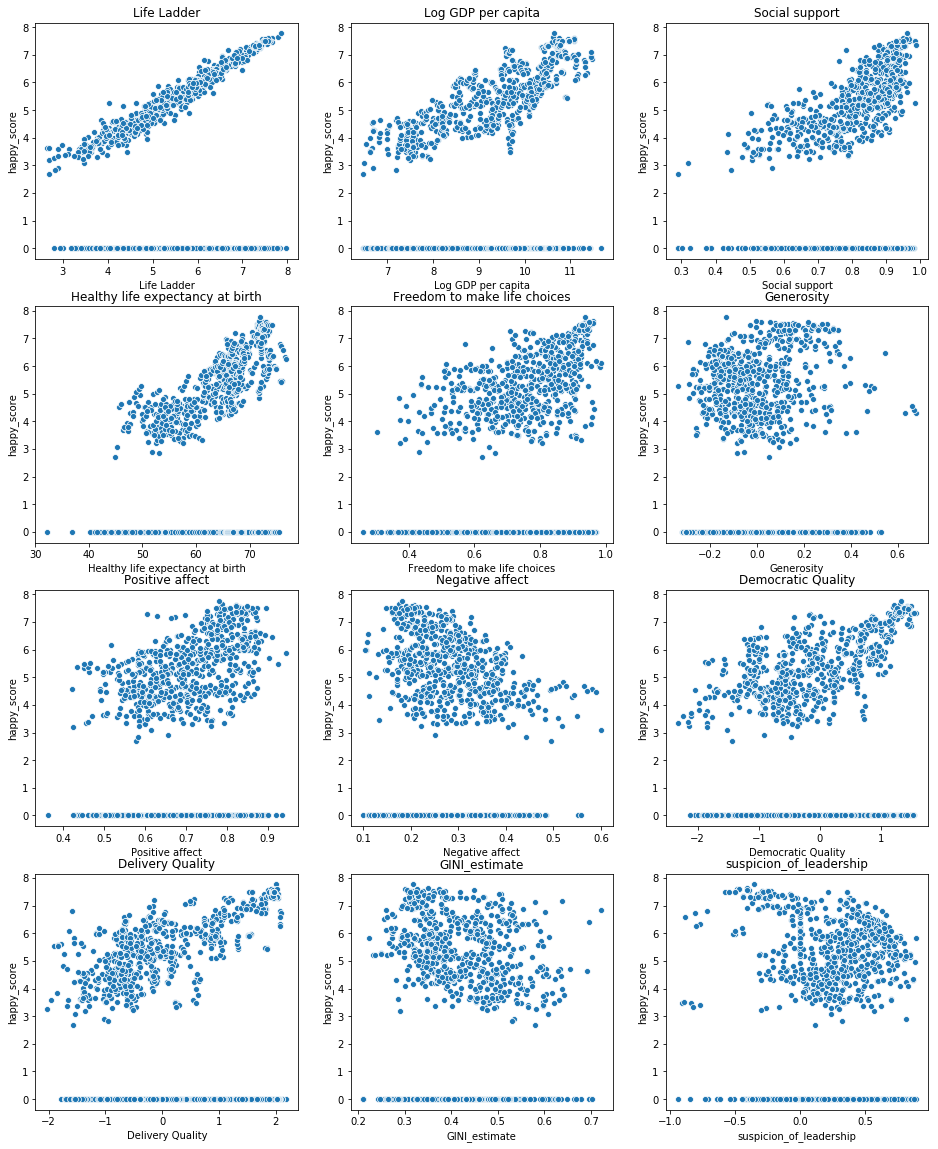

In [64]:
fig = plt.figure(figsize=[16,20])

for n in list(range(len(plot_cols))):
    plt.subplot(4,3,n+1)
    sns.scatterplot(x=plot_cols[n], y='happy_score', data=data_eda)
    plt.title(plot_cols[n])
plt.show()

In [65]:
top2019 = score2019[:25]
top2018 = score2018[:25]
top2017 = score2017[:25]
top2016 = score2016[:25]
top2015 = score2015[:25]

top_10s = pd.concat([top2019, top2018, top2017, top2016, top2015], ignore_index=True)
top_10s.head()

Country  Happiness Score
0      Finland           7.7689
1      Denmark           7.6001
2       Norway           7.5539
3      Iceland           7.4936
4  Netherlands           7.4876

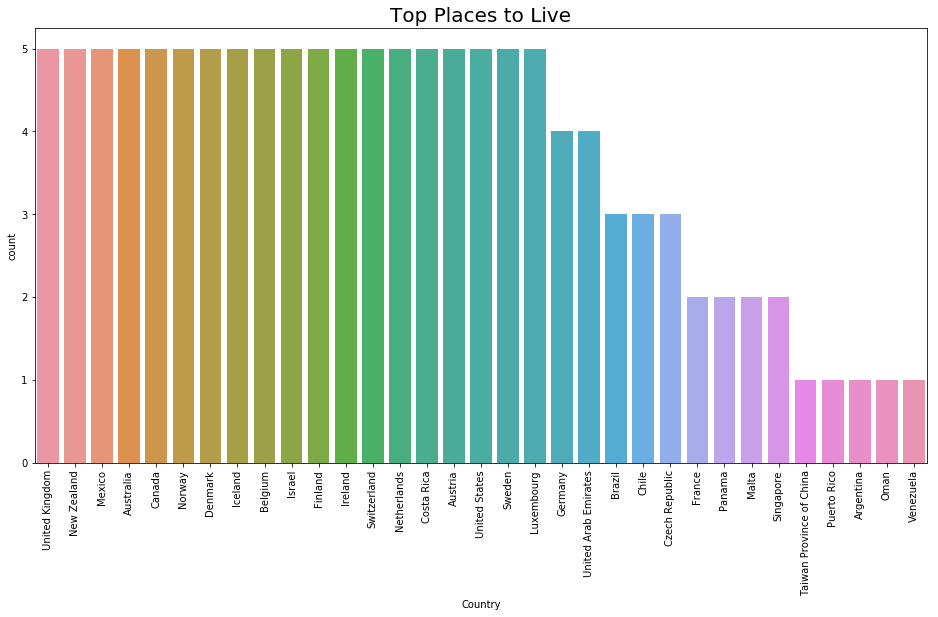

In [66]:
fig=plt.figure(figsize=[16,8])
sns.countplot(x='Country', data=top_10s, order=top_10s.Country.value_counts().index)
plt.xticks(rotation=90)
plt.title('Top Places to Live', fontsize=20)
plt.show()

In [67]:
avg_scores = []
for country in top_10s.Country.unique():
    df_country = top_10s.loc[top_10s.Country == country]
    h_score = df_country['Happiness Score'].mean()
    avg_scores.append([country, h_score])
    
top25s_scores = pd.DataFrame(avg_scores, columns=['Country', 'Average_Score'])
top25s_scores.head()

Country  Average_Score
0      Finland        7.53780
1      Denmark        7.54608
2       Norway        7.54092
3      Iceland        7.51096
4  Netherlands        7.40458

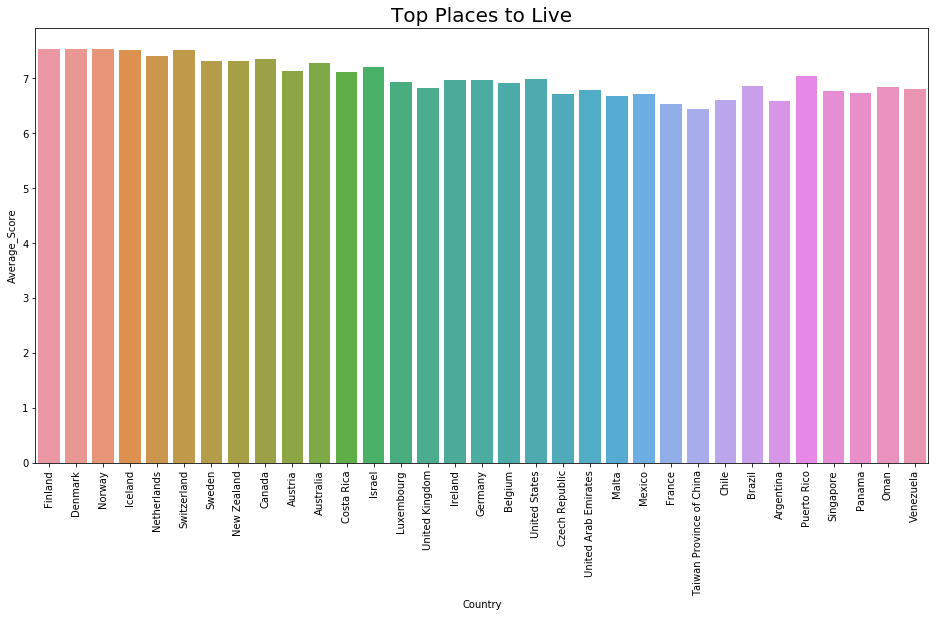

In [68]:
fig=plt.figure(figsize=[16,8])
sns.barplot(x='Country', y='Average_Score', data=top25s_scores)
plt.xticks(rotation=90)
plt.title('Top Places to Live', fontsize=20)
plt.show()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


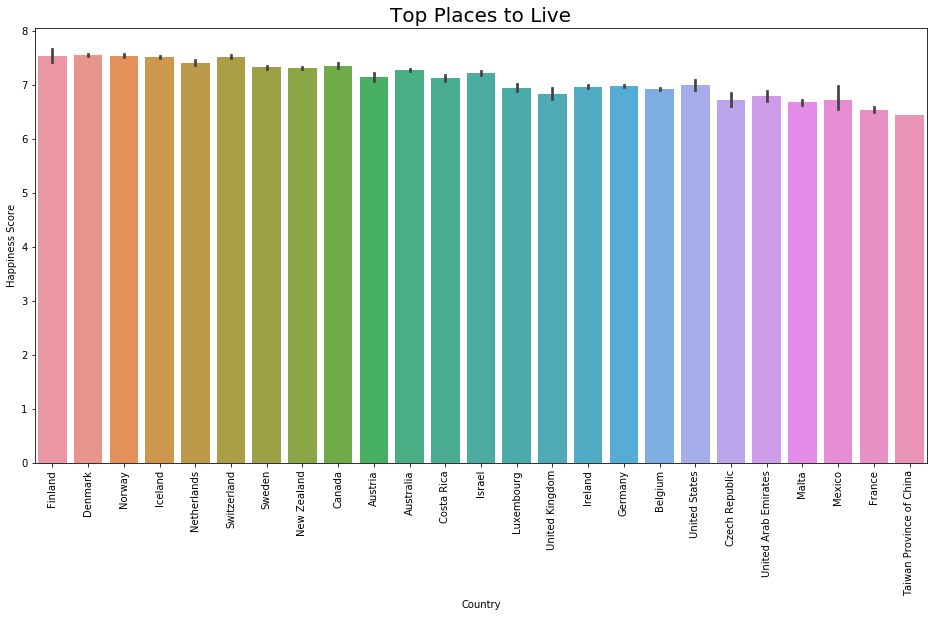

In [69]:
fig=plt.figure(figsize=[16,8])
sns.barplot(x='Country', y='Happiness Score', data=top_10s, order=top2019['Country'])
plt.xticks(rotation=90)
plt.title('Top Places to Live', fontsize=20)
plt.show()

In [70]:
bottom2019 = score2019[-25:]
bottom2018 = score2018[-25:]
bottom2017 = score2017[-25:]
bottom2016 = score2016[-25:]
bottom2015 = score2015[-25:]

bottoms = pd.concat([bottom2019, bottom2018, bottom2017, bottom2016, bottom2015], ignore_index=True)
bottoms.head()

Country  Happiness Score
0       Chad           4.3495
1    Ukraine           4.3322
2   Ethiopia           4.2858
3  Swaziland           4.2116
4     Uganda           4.1894

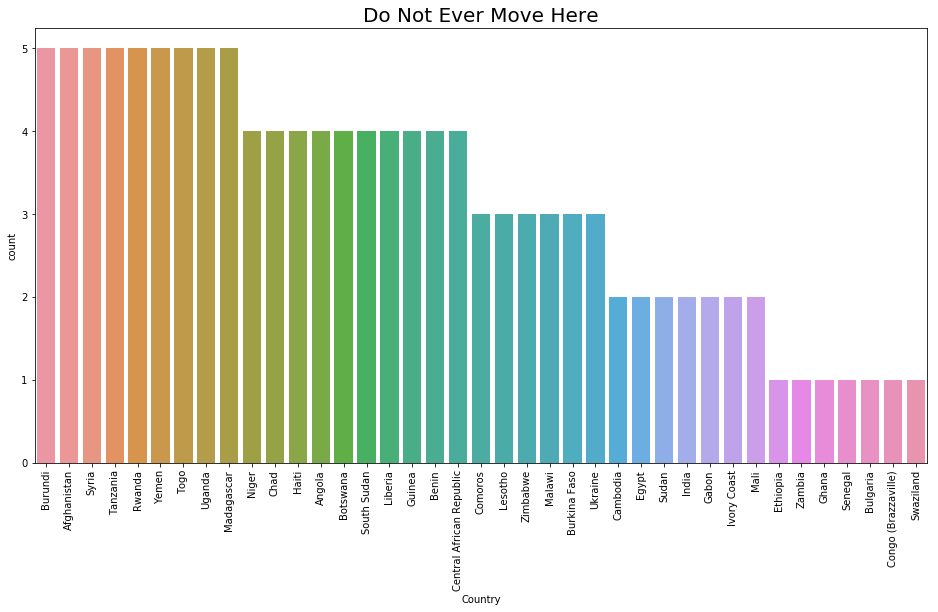

In [71]:
fig=plt.figure(figsize=[16,8])
sns.countplot(x='Country', data=bottom_10s, order=bottom_10s.Country.value_counts().index)
plt.xticks(rotation=90)
plt.title('Do Not Ever Move Here', fontsize=20)
plt.show()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


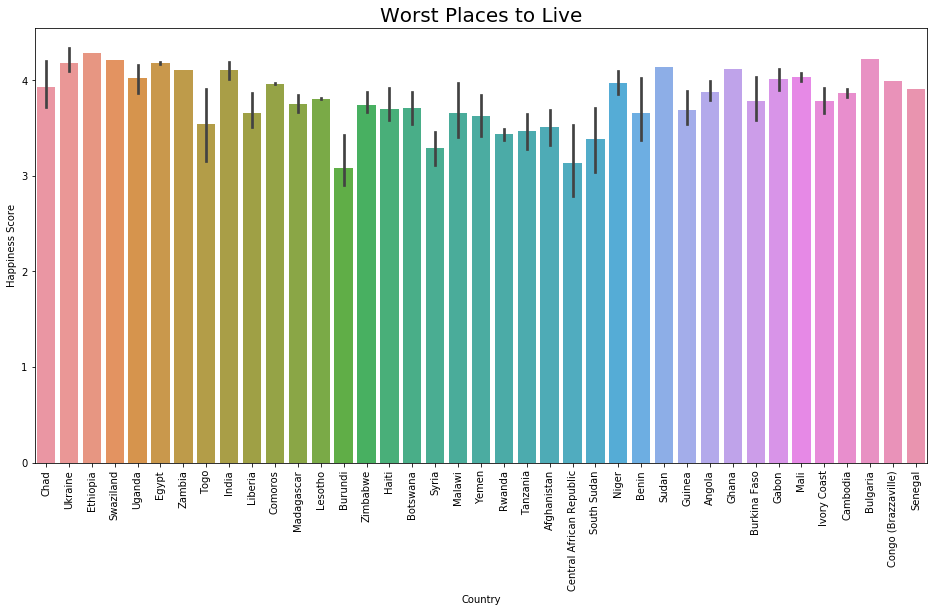

In [73]:
fig=plt.figure(figsize=[16,8])
sns.barplot(x='Country', y='Happiness Score', data=bottom_10s)
plt.xticks(rotation=90)
plt.title('Worst Places to Live', fontsize=20)
plt.show()

In [74]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

In [75]:
cmap_data = data_final.loc[data_final['happy_score'] != 0]
cmap_data.shape

(686, 15)

In [76]:
cmap_data.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2014     3.130896            7.516955        0.525568   
1  Afghanistan  2015     3.982855            7.500539        0.528597   
2  Afghanistan  2016     4.220169            7.497038        0.559072   
3  Afghanistan  2017     2.661718            7.497755        0.490880   
4  Afghanistan  2018     2.694303            7.494588        0.507516   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.880001                      0.508514    0.113184   
1                         53.200001                      0.388928    0.089091   
2                         53.000000                      0.522566    0.051365   
3                         52.799999                      0.427011   -0.112198   
4                         52.599998                      0.373536   -0.084888   

   Positive affect  Negative affect  Democratic Quality  Delivery Quality  \
0         0.531691         0.374861           -1.773257         -1.312503   
1         0.553553         0.339276           -1.844364         -1.291594   
2         0.564953         0.348332           -1.855426         -1.392713   
3         0.496349         0.371326           -1.886566         -1.437808   
4         0.424125         0.404904           -1.839903         -1.358654   

   GINI_estimate  happy_score  suspicion_of_leadership  
0       0.413974       3.5750                 0.462194  
1       0.596918       3.3600                 0.620081  
2       0.418629       3.7940                 0.468256  
3       0.286599       3.6315                 0.693214  
4       0.290681       3.2033                 0.562939

In [77]:
cmap_scores = []
for country in cmap_data['Country name'].unique():
    country_df = cmap_data.loc[cmap_data['Country name'] == country]
    h_score = country_df['happy_score'].mean()
    cmap_scores.append([country, h_score])
    
cmap_df = pd.DataFrame(cmap_scores, columns=['Country', 'Happiness_Score'])
cmap_df.head()

Country  Happiness_Score
0  Afghanistan         3.512760
1      Albania         4.712520
2      Algeria         5.495725
3       Angola         4.033000
4    Argentina         6.459460

In [78]:
data_all = [go.Choropleth(locationmode='country names', locations=cmap_df.Country,
                     z = cmap_df['Happiness_Score'], colorscale='Jet', reversescale=True)]
layout_all = go.Layout(title = 'Global Happiness Scores (average 2014-2018)',
                       geo = go.layout.Geo(showframe=False, showcoastlines=True))

In [79]:
world_all = go.Figure(data=data_all, layout=layout_all)
iplot(world_all)

locationmode = indicates how the map will identify locations from your data

locations = indicates what locations to inlude in plot

text = what text is to be displayed on hover

z = values used in colorscale

showframe = display a square frame around plot

showcoastlines = display coast lines

In [80]:
data = [go.Choropleth(locationmode='country names', locations=top_10s.Country,
                     z = top_10s['Happiness Score'])]
layout = go.Layout(geo = go.layout.Geo(showframe=False, showcoastlines=True))

In [81]:
world_test = go.Figure(data=data, layout=layout)
iplot(world_test)

In [82]:
data_2019 = [go.Choropleth(locationmode='country names', locations=score2019.Country,
                     z = score2019['Happiness Score'], colorscale='Jet', reversescale=True)]
layout_2019 = go.Layout(title = '2019 Global Happiness Scores',
                       geo = go.layout.Geo(showframe=False, showcoastlines=True))

In [83]:
world_2019 = go.Figure(data=data_2019, layout=layout_2019)
iplot(world_2019)

In [76]:
fin = cmap_data.loc[cmap_data['Country name'] == 'Finland']
fin.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
199      Finland  2014     7.384571           10.571767        0.952017   
200      Finland  2015     7.447926           10.569822        0.947801   
201      Finland  2016     7.659843           10.588078        0.953940   
202      Finland  2017     7.788252           10.611172        0.963826   
203      Finland  2018     7.858107           10.636060        0.962155   

     Healthy life expectancy at birth  Freedom to make life choices  \
199                         71.360001                      0.933044   
200                         71.599998                      0.929862   
201                         71.699997                      0.948372   
202                         71.800003                      0.962199   
203                         71.900002                      0.937807   

     Generosity  Positive affect  Negative affect  Democratic Quality  \
199   -0.005278         0.784110         0.198814            1.412057   
200    0.107067         0.751316         0.191058            1.292036   
201   -0.030627         0.797325         0.181998            1.265372   
202   -0.005696         0.787137         0.176066            1.311007   
203   -0.131735         0.781546         0.181781            1.320118   

     Delivery Quality  GINI_estimate  happy_score  suspicion_of_leadership  
199          2.037090       0.324403       7.4060                -0.203079  
200          1.997027       0.335228       7.4130                -0.334231  
201          1.975339       0.335218       7.4690                -0.236068  
202          1.999900       0.350615       7.6321                -0.405126  
203          2.002339       0.318955       7.7689                -0.356497

In [81]:
test = fin['happy_score'].iloc[-1]
test

7.768899917602539

In [84]:
cmap_change = []
for country in cmap_data['Country name'].unique():
    country_df = cmap_data.loc[cmap_data['Country name'] == country]
    h_score1 = country_df['happy_score'].iloc[0]
    h_score2 = country_df['happy_score'].iloc[-1]
    change = h_score2 - h_score1
    cmap_change.append([country, change])
    
cmap_change_df = pd.DataFrame(cmap_change, columns=['Country', 'Happiness_Score_Change'])
cmap_change_df.head()

Country  Happiness_Score_Change
0  Afghanistan                 -0.3717
1      Albania                 -0.2404
2      Algeria                 -0.3937
3       Angola                  0.0000
4    Argentina                 -0.4877

In [85]:
data_change = [go.Choropleth(locationmode='country names', locations=cmap_change_df.Country,
                     z = cmap_change_df['Happiness_Score_Change'], colorscale='Jet', reversescale=True)]
layout_change = go.Layout(title = 'Change in Global Happiness Scores from 2014-2018',
                       geo = go.layout.Geo(showframe=False, showcoastlines=True))

In [86]:
world_change = go.Figure(data=data_change, layout=layout_change)
iplot(world_change)

# Model Selection

Model selection will be performed with a subset of labeled data. A holdout set of labeled data will be set aside to test the performance of the final model.

The steps for model creation will be as follows:
1. Split labeled data into a training set and a hold out set.
2. Use the training set to determine which classifiers perform best and select which classifiers to include in the first and second level estimators.
3. Use the training data to optimize the hyperparameters for the first and second level estimators.
4. Stack the first and second level estimators to create the final model and assess its performance on the hold out set.
5. Use the final model to create pseudo-labels for the unlabeled data and join it with the labeled training set.
6. Retrain the final model on the labeled and pseudo-labeled data and assess its performance on the hold out set.

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [88]:
import xgboost as xgb

In [89]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [90]:
import time

In [91]:
# for decision trees
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

#plot_feature_importances(tree_clf)

In [92]:
selection_data = data_final.loc[data_final['happy_score'] != 0]
print(selection_data.shape)
selection_data.head()

(686, 15)


Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2014     3.130896            7.516955        0.525568   
1  Afghanistan  2015     3.982855            7.500539        0.528597   
2  Afghanistan  2016     4.220169            7.497038        0.559072   
3  Afghanistan  2017     2.661718            7.497755        0.490880   
4  Afghanistan  2018     2.694303            7.494588        0.507516   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.880001                      0.508514    0.113184   
1                         53.200001                      0.388928    0.089091   
2                         53.000000                      0.522566    0.051365   
3                         52.799999                      0.427011   -0.112198   
4                         52.599998                      0.373536   -0.084888   

   Positive affect  Negative affect  Democratic Quality  Delivery Quality  \
0         0.531691         0.374861           -1.773257         -1.312503   
1         0.553553         0.339276           -1.844364         -1.291594   
2         0.564953         0.348332           -1.855426         -1.392713   
3         0.496349         0.371326           -1.886566         -1.437808   
4         0.424125         0.404904           -1.839903         -1.358654   

   GINI_estimate  happy_score  suspicion_of_leadership  
0       0.413974       3.5750                 0.462194  
1       0.596918       3.3600                 0.620081  
2       0.418629       3.7940                 0.468256  
3       0.286599       3.6315                 0.693214  
4       0.290681       3.2033                 0.562939

In [93]:
selection_data['happy_score_index'] = round(selection_data['happy_score'])
selection_data['happy_score_index'] = selection_data['happy_score_index'].astype('int64')
selection_data.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2014     3.130896            7.516955        0.525568   
1  Afghanistan  2015     3.982855            7.500539        0.528597   
2  Afghanistan  2016     4.220169            7.497038        0.559072   
3  Afghanistan  2017     2.661718            7.497755        0.490880   
4  Afghanistan  2018     2.694303            7.494588        0.507516   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.880001                      0.508514    0.113184   
1                         53.200001                      0.388928    0.089091   
2                         53.000000                      0.522566    0.051365   
3                         52.799999                      0.427011   -0.112198   
4                         52.599998                      0.373536   -0.084888   

   Positive affect  Negative affect  Democratic Quality  Delivery Quality  \
0         0.531691         0.374861           -1.773257         -1.312503   
1         0.553553         0.339276           -1.844364         -1.291594   
2         0.564953         0.348332           -1.855426         -1.392713   
3         0.496349         0.371326           -1.886566         -1.437808   
4         0.424125         0.404904           -1.839903         -1.358654   

   GINI_estimate  happy_score  suspicion_of_leadership  happy_score_index  
0       0.413974       3.5750                 0.462194                  4  
1       0.596918       3.3600                 0.620081                  3  
2       0.418629       3.7940                 0.468256                  4  
3       0.286599       3.6315                 0.693214                  4  
4       0.290681       3.2033                 0.562939                  3

In [94]:
selection_data['happy_score_index'].value_counts()

5    203
6    189
4    143
7    113
3     23
8     15
Name: happy_score_index, dtype: int64

In [95]:
X = selection_data.drop(['Country name', 'Year', 'happy_score', 'happy_score_index'], axis=1)
y = selection_data['happy_score_index']

In [98]:
training_x, holdout_x, training_y, holdout_y = train_test_split(X, y, test_size=0.15, random_state=26)

In [99]:
print(training_y.value_counts())
print(holdout_y.value_counts())

5    177
6    153
4    127
7     94
3     20
8     12
Name: happy_score_index, dtype: int64
6    36
5    26
7    19
4    16
8     3
3     3
Name: happy_score_index, dtype: int64


In [100]:
X_train, X_test, y_train, y_test = train_test_split(training_x, training_y, random_state=26)

In [101]:
print(X_train.shape)
print(X_test.shape)

(437, 12)
(146, 12)


## Vanilla Models

In [102]:
nb = GaussianNB()
tree = DecisionTreeClassifier(random_state=26)
forest = RandomForestClassifier(random_state=26)
bag = BaggingClassifier(random_state=26)
adaboost = AdaBoostClassifier(random_state=26)
gradient = GradientBoostingClassifier(random_state=26)
svc = SVC(random_state=26)
knn = KNeighborsClassifier()
XGB = xgb.XGBClassifier(seed=26)

vanilla_models = [nb, tree, forest, bag, adaboost, gradient, svc, knn, XGB]

In [103]:
vanilla = []

for model in vanilla_models:
    start = time.time()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    end = time.time()
    duration = end - start
    vanilla.append([model, train_acc, test_acc, duration])
    
vanilla_results = pd.DataFrame(vanilla, columns=['Model', 'Training_Accuracy', 'Testing_Accuracy', 'Time'])
vanilla_results['Model'] = ['Naive Bayes','DecisionTree', 'RandomForest', 'Bagging', 'AdaBoost', 
                            'GradientBoosting', 'SVC', 'KNearestNeighbors', 'XGBoost']
vanilla_results

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Model  Training_Accuracy  Testing_Accuracy      Time
0        Naive Bayes           0.762014          0.712329  0.005174
1       DecisionTree           1.000000          0.780822  0.005096
2       RandomForest           0.993135          0.801370  0.016745
3            Bagging           0.981693          0.760274  0.027034
4           AdaBoost           0.661327          0.678082  0.066975
5   GradientBoosting           1.000000          0.808219  0.404204
6                SVC           0.787185          0.787671  0.009206
7  KNearestNeighbors           0.844394          0.712329  0.003666
8            XGBoost           0.995423          0.821918  0.143913

In [378]:
# for decision trees
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

#plot_feature_importances(tree_clf)

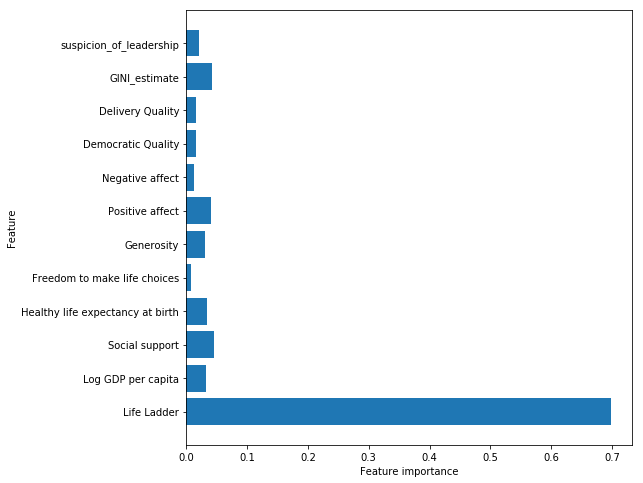

In [379]:
plot_feature_importances(tree)

#### Scale the values and assess the vanilla models

In [104]:
scale = StandardScaler()
scaled_X = training_x.copy()
scaled_X = pd.DataFrame(scale.fit_transform(scaled_X), columns=X.columns)
scaled_X.head()

Life Ladder  Log GDP per capita  Social support  \
0    -0.315760           -0.010254        0.034635   
1    -0.718678           -0.889359       -0.328405   
2    -1.165915           -1.684290       -1.463441   
3    -0.517711            0.016366       -1.469536   
4     0.728679            1.191728        0.576695   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         -0.354149                      0.136238    2.936242   
1                         -0.396255                      1.522629    0.571118   
2                         -0.747142                     -1.436006   -0.161902   
3                          0.490786                     -0.200439   -0.152202   
4                          0.628334                      1.087090    0.838493   

   Positive affect  Negative affect  Democratic Quality  Delivery Quality  \
0         1.647528        -0.137440           -0.131877         -0.343379   
1         0.894886         1.414051           -0.458723         -0.895730   
2         0.439917         1.026781           -0.274985         -0.955524   
3        -0.207721         0.560201            0.489510         -0.193243   
4         1.039893         0.041656           -1.248437          0.228984   

   GINI_estimate  suspicion_of_leadership  
0      -0.365055                 0.119707  
1       1.392566                -0.569147  
2       0.928238                 0.133242  
3      -0.699708                 0.366340  
4       0.274754                -0.772599

In [381]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(scaled_X, training_y, random_state=26)

In [245]:
print(ys_test.value_counts())
print(ys_train.value_counts())

5    52
6    39
4    30
7    19
8     4
3     2
Name: happy_score_index, dtype: int64
5    125
6    114
4     97
7     75
3     18
8      8
Name: happy_score_index, dtype: int64


In [386]:
scale_vanilla = []

for model in vanilla_models:
    start = time.time()
    model.fit(Xs_train, ys_train)
    scale_train_preds = model.predict(Xs_train)
    scale_test_preds = model.predict(Xs_test)
    scale_train_acc = accuracy_score(ys_train, scale_train_preds)
    scale_test_acc = accuracy_score(ys_test, scale_test_preds)
    end = time.time()
    duration = end - start
    scale_vanilla.append([model, scale_train_acc, scale_test_acc, duration])
    
scale_vanilla_results = pd.DataFrame(scale_vanilla, columns=['Model', 'Training_Accuracy(scaled)', 
                                                             'Testing_Accuracy(scaled)', 'Time(scaled)'])
scale_vanilla_results['Model'] = ['Naive Bayes','DecisionTree', 'RandomForest', 'Bagging', 'AdaBoost', 
                                  'GradientBoosting', 'SVC', 'KNearestNeighbors', 'XGBoost']

vanilla_results = pd.merge(vanilla_results, scale_vanilla_results, on='Model', how='outer', suffixes=())
vanilla_results



/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Model  Training_Accuracy  Testing_Accuracy      Time  \
0        Naive Bayes           0.762014          0.712329  0.005174   
1       DecisionTree           1.000000          0.780822  0.005096   
2       RandomForest           0.993135          0.801370  0.016745   
3            Bagging           0.981693          0.760274  0.027034   
4           AdaBoost           0.661327          0.678082  0.066975   
5   GradientBoosting           1.000000          0.808219  0.404204   
6                SVC           0.787185          0.787671  0.009206   
7  KNearestNeighbors           0.844394          0.712329  0.003666   
8            XGBoost           0.995423          0.821918  0.143913   

   Training_Accuracy(scaled)_x  Testing_Accuracy(scaled)_x  Time(scaled)_x  \
0                     0.762014                    0.712329        0.004719   
1                     1.000000                    0.780822        0.004559   
2                     0.993135                    0.801370        0.014261   
3                     0.981693                    0.760274        0.024780   
4                     0.661327                    0.678082        0.063476   
5                     1.000000                    0.808219        0.382352   
6                     0.826087                    0.739726        0.008992   
7                     0.835240                    0.705479        0.005152   
8                     0.995423                    0.821918        0.147786   

   Training_Accuracy(smote)  Testing_Accuracy(smote)  Time(smote)  \
0                  0.816000                 0.719178     0.005911   
1                  1.000000                 0.712329     0.007146   
2                  0.996000                 0.753425     0.017305   
3                  0.986667                 0.767123     0.035479   
4                  0.613333                 0.657534     0.092246   
5                  1.000000                 0.787671     0.515998   
6                  0.848000                 0.712329     0.018745   
7                  0.901333                 0.650685     0.004550   
8                       NaN                      NaN          NaN   

   Training_Accuracy(scale&smote)  Testing_Accuracy(scale&smote)  \
0                        0.813333                       0.356164   
1                        1.000000                       0.130137   
2                        0.996000                       0.198630   
3                        0.990667                       0.130137   
4                        0.630667                       0.130137   
5                        1.000000                       0.157534   
6                        0.885333                       0.356164   
7                        0.904000                       0.356164   
8                             NaN                            NaN   

   Time(scale&smote)  Training_Accuracy(scaled)_y  Testing_Accuracy(scaled)_y  \
0           0.003859                     0.762014                    0.712329   
1           0.007514                     1.000000                    0.780822   
2           0.017568                     0.993135                    0.801370   
3           0.035532                     0.981693                    0.760274   
4           0.099951                     0.661327                    0.678082   
5           0.515712                     1.000000                    0.808219   
6           0.017400                     0.826087                    0.739726   
7           0.008473                     0.835240                    0.705479   
8                NaN                     0.995423                    0.821918   

   Time(scaled)_y  Training_Accuracy(scaled)  Testing_Accuracy(scaled)  \
0        0.005023                   0.762014                  0.712329   
1        0.004978                   1.000000                  0.780822   
2        0.015780                   0.993135                  0.801370   
3        0.025593                   0.981693

In [383]:
# for decision trees
def plot_feature_importances(model):
    n_features = Xs_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), Xs_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

#plot_feature_importances(tree_clf)

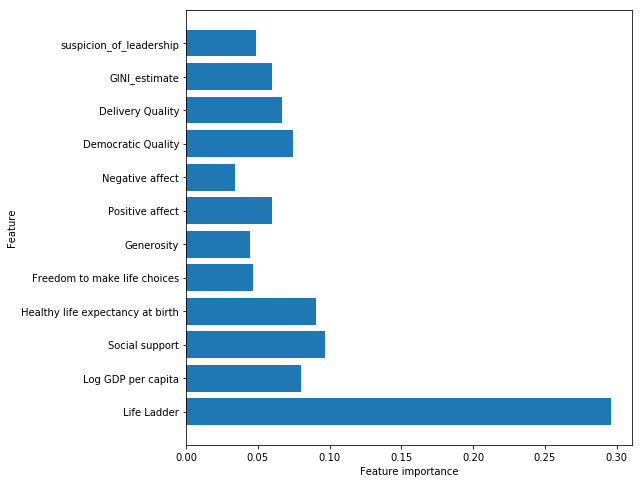

In [388]:
plot_feature_importances(forest)

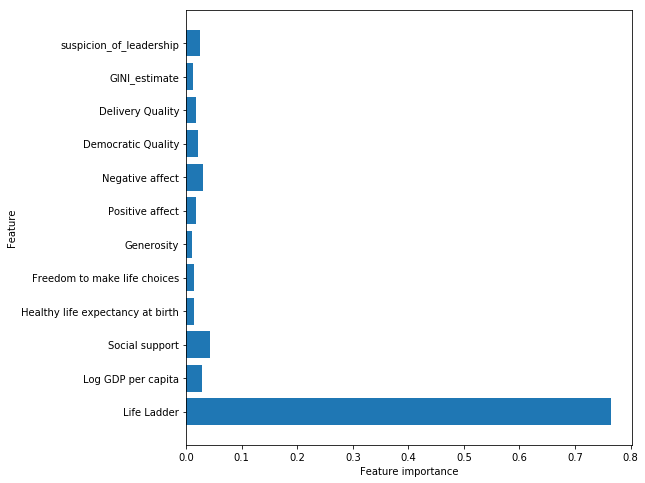

In [389]:
plot_feature_importances(gradient)

#### Correct for class imbalance in training data with SMOTE and weights

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
Xsm_train, ysm_train = SMOTE().fit_sample(X_train, y_train)

In [110]:
vanilla_models2 = [nb, tree, forest, bag, adaboost, gradient, svc, knn]

In [111]:
smote_vanilla = []

for model in vanilla_models2:
    start = time.time()
    model.fit(Xsm_train, ysm_train)
    smote_train_preds = model.predict(Xsm_train)
    smote_test_preds = model.predict(X_test)
    smote_train_acc = accuracy_score(ysm_train, smote_train_preds)
    smote_test_acc = accuracy_score(y_test, smote_test_preds)
    end = time.time()
    duration = end - start
    smote_vanilla.append([model, smote_train_acc, smote_test_acc, duration])
    
smote_vanilla_results = pd.DataFrame(smote_vanilla, columns=['Model', 'Training_Accuracy(smote)', 
                                                             'Testing_Accuracy(smote)', 
                                                             'Time(smote)'])
smote_vanilla_results['Model'] = ['Naive Bayes','DecisionTree', 'RandomForest', 'Bagging', 'AdaBoost', 
                                  'GradientBoosting', 'SVC', 'KNearestNeighbors']

vanilla_results = pd.merge(vanilla_results, smote_vanilla_results, on='Model', how='outer')
vanilla_results

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Model  Training_Accuracy  Testing_Accuracy      Time  \
0        Naive Bayes           0.762014          0.712329  0.005174   
1       DecisionTree           1.000000          0.780822  0.005096   
2       RandomForest           0.993135          0.801370  0.016745   
3            Bagging           0.981693          0.760274  0.027034   
4           AdaBoost           0.661327          0.678082  0.066975   
5   GradientBoosting           1.000000          0.808219  0.404204   
6                SVC           0.787185          0.787671  0.009206   
7  KNearestNeighbors           0.844394          0.712329  0.003666   
8            XGBoost           0.995423          0.821918  0.143913   

   Training_Accuracy(scaled)  Testing_Accuracy(scaled)  Time(scaled)  \
0                   0.762014                  0.712329      0.004719   
1                   1.000000                  0.780822      0.004559   
2                   0.993135                  0.801370      0.014261   
3                   0.981693                  0.760274      0.024780   
4                   0.661327                  0.678082      0.063476   
5                   1.000000                  0.808219      0.382352   
6                   0.826087                  0.739726      0.008992   
7                   0.835240                  0.705479      0.005152   
8                   0.995423                  0.821918      0.147786   

   Training_Accuracy(smote)  Testing_Accuracy(smote)  Time(smote)  
0                  0.816000                 0.719178     0.005911  
1                  1.000000                 0.712329     0.007146  
2                  0.996000                 0.753425     0.017305  
3                  0.986667                 0.767123     0.035479  
4                  0.613333                 0.657534     0.092246  
5                  1.000000                 0.787671     0.515998  
6                  0.848000                 0.712329     0.018745  
7                  0.901333                 0.650685     0.004550  
8                       NaN                      NaN          NaN

In [112]:
print(y_train.value_counts())
y_train.value_counts(normalize=True)

5    125
6    114
4     97
7     75
3     18
8      8
Name: happy_score_index, dtype: int64


5    0.286041
6    0.260870
4    0.221968
7    0.171625
3    0.041190
8    0.018307
Name: happy_score_index, dtype: float64

In [218]:
# Still need to figure out best way to present confusion matricies



# # nb = GaussianNB() - does not allow for weighting classes
# tree = DecisionTreeClassifier(class_weight='balanced')
# forest = RandomForestClassifier(class_weight='balanced')
# # bag = BaggingClassifier() - does not allow for weighting classes
# # adaboost = AdaBoostClassifier() - does not allow for weighting classes
# # gradient = GradientBoostingClassifier() - does not allow for weighting classes
# svc = SVC(class_weight='balanced')
# # knn = KNeighborsClassifier() - does not allow for weighting classes
# # XGB = xgb.XGBClassifier() - does not allow for weighting classes

# weight_models = [tree, forest, svc]

In [223]:
# weighted = []

# for model in weight_models:
#     start = time.time()
#     model.fit(X_train, y_train)
#     train_preds = model.predict(X_train)
#     test_preds = model.predict(X_test)
#     train_acc = accuracy_score(y_train, train_preds)
#     test_acc = accuracy_score(y_test, test_preds)
#     end = time.time()
#     duration = end - start
#     weighted.append([model, train_acc, test_acc, duration])
#     print(model)
#     display(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
    
# # weight_results = pd.DataFrame(weighted, columns=['Model', 'Training_Accuracy(balanced)', 
# #                                                  'Testing_Accuracy(balanced)', 'Time'])
# # weight_results['Model'] = ['DecisionTree', 'RandomForest','SVC']
# # weight_results

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Predicted  3   4   5   6   7  8  All
True                                
3          1   4   0   0   0  0    5
4          3  28   6   0   0  0   37
5          0   5  37   6   0  0   48
6          0   0   0  25   3  0   28
7          0   0   0   4  18  1   23
8          0   0   0   0   0  3    3
All        4  37  43  35  21  4  144

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


Predicted  3   4   5   6   7  8  All
True                                
3          1   4   0   0   0  0    5
4          3  28   6   0   0  0   37
5          0   3  41   4   0  0   48
6          0   0   1  27   0  0   28
7          0   0   0   4  18  1   23
8          0   0   0   0   0  3    3
All        4  35  48  35  18  4  144

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Predicted   3   4   5   6   7   8  All
True                                  
3           3   2   0   0   0   0    5
4          13  17   7   0   0   0   37
5           0  12  31   5   0   0   48
6           0   0   2  24   2   0   28
7           0   0   0   5  10   8   23
8           0   0   0   0   0   3    3
All        16  31  40  34  12  11  144

In [221]:
pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   3   4   5   6   7   8  All
True                                  
3           3   2   0   0   0   0    5
4          13  17   7   0   0   0   37
5           0  12  31   5   0   0   48
6           0   0   2  24   2   0   28
7           0   0   0   5  10   8   23
8           0   0   0   0   0   3    3
All        16  31  40  34  12  11  144

In [229]:
# weighting = {8:500, 7:1, 6:1, 5:1, 4:1, 3:500}
# # nb = GaussianNB() - does not allow for weighting classes
# tree = DecisionTreeClassifier(class_weight=weighting)
# forest = RandomForestClassifier(class_weight=weighting)
# # bag = BaggingClassifier() - does not allow for weighting classes
# # adaboost = AdaBoostClassifier() - does not allow for weighting classes
# # gradient = GradientBoostingClassifier() - does not allow for weighting classes
# svc = SVC(class_weight=weighting)
# # knn = KNeighborsClassifier() - does not allow for weighting classes
# # XGB = xgb.XGBClassifier() - does not allow for weighting classes

# weight_models = [tree, forest, svc]

# weighteds = []

# for model in weight_models:
#     start = time.time()
#     model.fit(X_train, y_train)
#     strain_preds = model.predict(X_train)
#     stest_preds = model.predict(X_test)
#     strain_acc = accuracy_score(y_train, strain_preds)
#     stest_acc = accuracy_score(y_test, stest_preds)
#     end = time.time()
#     duration = end - start
#     weighteds.append([model, strain_acc, stest_acc, duration])
#     print(model)
#     display(pd.crosstab(y_test, stest_preds, rownames=['True'], colnames=['Predicted'], margins=True))
    
# # sweight_results = pd.DataFrame(weighted, columns=['Model', 'Training_Accuracy(weight:10000)', 
# #                                                   'Testing_Accuracy(weight:10000)', 'Time'])
# # sweight_results['Model'] = ['DecisionTree', 'RandomForest', 'SVC']
# # weight_results = pd.merge(weight_results, sweight_results, on='Model', how='outer')
# # weight_results

DecisionTreeClassifier(class_weight={8: 500, 7: 1, 6: 1, 5: 1, 4: 1, 3: 500},
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Predicted  3   4   5   6   7  8  All
True                                
3          1   4   0   0   0  0    5
4          3  24  10   0   0  0   37
5          0   2  38   8   0  0   48
6          0   1   1  23   3  0   28
7          0   0   0   4  18  1   23
8          0   0   0   0   0  3    3
All        4  31  49  35  21  4  144

RandomForestClassifier(bootstrap=True,
            class_weight={8: 500, 7: 1, 6: 1, 5: 1, 4: 1, 3: 500},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Predicted  3   4   5   6   7  8  All
True                                
3          1   4   0   0   0  0    5
4          1  30   6   0   0  0   37
5          0   4  40   4   0  0   48
6          0   0   2  26   0  0   28
7          0   0   1   3  18  1   23
8          0   0   0   0   0  3    3
All        2  38  49  33  18  4  144

SVC(C=1.0, cache_size=200,
  class_weight={8: 500, 7: 1, 6: 1, 5: 1, 4: 1, 3: 500}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Predicted   3   4   5   6   7   8  All
True                                  
3           3   2   0   0   0   0    5
4          13  15   9   0   0   0   37
5           0   5  38   5   0   0   48
6           0   0   2  24   2   0   28
7           0   0   0   5  10   8   23
8           0   0   0   0   0   3    3
All        16  22  49  34  12  11  144

In [113]:
Xss_train, yss_train = SMOTE().fit_sample(Xs_train, ys_train)

In [114]:
sc_sm_vanilla = []

for model in vanilla_models2:
    start = time.time()
    model.fit(Xss_train, yss_train)
    ss_train_preds = model.predict(Xss_train)
    ss_test_preds = model.predict(X_test)
    ss_train_acc = accuracy_score(yss_train, ss_train_preds)
    ss_test_acc = accuracy_score(y_test, ss_test_preds)
    end = time.time()
    duration = end - start
    sc_sm_vanilla.append([model, ss_train_acc, ss_test_acc, duration])
    
sc_sm_vanilla_results = pd.DataFrame(sc_sm_vanilla, columns=['Model', 'Training_Accuracy(scale&smote)', 'Testing_Accuracy(scale&smote)', 
                                                             'Time(scale&smote)'])
sc_sm_vanilla_results['Model'] = ['Naive Bayes','DecisionTree', 'RandomForest', 'Bagging', 'AdaBoost', 
                                  'GradientBoosting', 'SVC', 'KNearestNeighbors']

vanilla_results = pd.merge(vanilla_results, sc_sm_vanilla_results, on='Model', how='outer')
vanilla_results

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Model  Training_Accuracy  Testing_Accuracy      Time  \
0        Naive Bayes           0.762014          0.712329  0.005174   
1       DecisionTree           1.000000          0.780822  0.005096   
2       RandomForest           0.993135          0.801370  0.016745   
3            Bagging           0.981693          0.760274  0.027034   
4           AdaBoost           0.661327          0.678082  0.066975   
5   GradientBoosting           1.000000          0.808219  0.404204   
6                SVC           0.787185          0.787671  0.009206   
7  KNearestNeighbors           0.844394          0.712329  0.003666   
8            XGBoost           0.995423          0.821918  0.143913   

   Training_Accuracy(scaled)  Testing_Accuracy(scaled)  Time(scaled)  \
0                   0.762014                  0.712329      0.004719   
1                   1.000000                  0.780822      0.004559   
2                   0.993135                  0.801370      0.014261   
3                   0.981693                  0.760274      0.024780   
4                   0.661327                  0.678082      0.063476   
5                   1.000000                  0.808219      0.382352   
6                   0.826087                  0.739726      0.008992   
7                   0.835240                  0.705479      0.005152   
8                   0.995423                  0.821918      0.147786   

   Training_Accuracy(smote)  Testing_Accuracy(smote)  Time(smote)  \
0                  0.816000                 0.719178     0.005911   
1                  1.000000                 0.712329     0.007146   
2                  0.996000                 0.753425     0.017305   
3                  0.986667                 0.767123     0.035479   
4                  0.613333                 0.657534     0.092246   
5                  1.000000                 0.787671     0.515998   
6                  0.848000                 0.712329     0.018745   
7                  0.901333                 0.650685     0.004550   
8                       NaN                      NaN          NaN   

   Training_Accuracy(scale&smote)  Testing_Accuracy(scale&smote)  \
0                        0.813333                       0.356164   
1                        1.000000                       0.130137   
2                        0.996000                       0.198630   
3                        0.990667                       0.130137   
4                        0.630667                       0.130137   
5                        1.000000                       0.157534   
6                        0.885333                       0.356164   
7                        0.904000                       0.356164   
8                             NaN                            NaN   

   Time(scale&smote)  
0           0.003859  
1           0.007514  
2           0.017568  
3           0.035532  
4           0.099951  
5           0.515712  
6           0.017400  
7           0.008473  
8                NaN

**Analysis of Vanilla Models:** Time does not seem to be a factor as all models were able to fit and predict in under one second. Naive Bayes seems to be the weakest classification model as its training and testing accuracy scores were consistently in the bottom half of the performance measures. All models except for AdaBoost displayed evidence of overfitting as their training scores were higher than their testing scores, despite scaling and class imbalance intervention measures. The DecisionTree and GradientBoosting classifiers seemed to display the most overfitting because they scored 100% accuracy on their training evaluation. The XGBoost classifier is not compatible with SMOTE, thus it was not evaluated under those interventions. While SMOTE did not significantly increase the performance of the classifiers over scaling, weighting the classes should be explored to address imbalance in the final model. Additionally, combining scaled features with SMOTE produced abissmal accuracy results. For this reason a classifier that can accomodate class weighting will be included in the first level of esitmators. The RandonForest classifier will be included as a first level estimator because its vanilla perfomance is strong comparied to the other classifiers and it accomodates class weighting.

To create the pseudo-labels, three of the models from the vanilla classifiers will be selected based on performance and diversity of algorithms to create the first level of estimators. The second level of estimators will be the model that performs the best during initial selection phase.

First Level Estimators:
* Random Forest
* KNN
* Gradient Boosting

Second Level Estimator:
* XGBoost

### Hyperparameter Optimization

Each of the classifiers will undergo hyperparameter tuning to optimize performance

In [136]:
# KNN tuning

knn = KNeighborsClassifier()
param_knn = {'n_neighbors': [17,19,21],
            'weights': ['uniform', 'distance'],
            'p': [1,2,3],
            'metric': ['manhattan', 'minkowski', 'euclidean']}
knn_grid = GridSearchCV(knn, param_grid=param_knn, cv=3)
knn_grid.fit(Xs_train, ys_train)

print(knn_grid.best_params_)
print(f"Best Score accuracy: {knn_grid.best_score_}")
knn_preds_train = knn_grid.predict(Xs_train)
knn_preds = knn_grid.predict(Xs_test)
knn_acc_train = accuracy_score(ys_train, knn_preds_train)
knn_acc = accuracy_score(ys_test, knn_preds)
print(f"Training accuracy: {knn_acc_train}")
print(f"Testing accuracy: {knn_acc}")
pd.crosstab(ys_test, knn_preds, rownames=['True'], colnames=['Predicted'], margins=True)

{'metric': 'manhattan', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
Best Score accuracy: 0.6750572082379863
Training accuracy: 1.0
Testing accuracy: 0.7123287671232876


/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Predicted   4   5   6   7  All
True                          
3           2   0   0   0    2
4          19  11   0   0   30
5          10  34   8   0   52
6           0   2  36   1   39
7           0   0   4  15   19
8           0   0   0   4    4
All        31  47  48  20  146

In [137]:
pd.crosstab(ys_train, knn_preds_train, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   3   4    5    6   7  8  All
True                                   
3          18   0    0    0   0  0   18
4           0  97    0    0   0  0   97
5           0   0  125    0   0  0  125
6           0   0    0  114   0  0  114
7           0   0    0    0  75  0   75
8           0   0    0    0   0  8    8
All        18  97  125  114  75  8  437

In [207]:
# GradientBoost tuning

gb = GradientBoostingClassifier(random_state=26)
param_gb = {'learning_rate': [0.07, 0.05],
           'n_estimators': [25, 50, 75],
           'max_depth': [2,3]}
gb_grid = GridSearchCV(gb, param_grid=param_gb, cv=3)
gb_grid.fit(Xs_train, ys_train)

print(gb_grid.best_params_)
print(f"Best Score accuracy: {gb_grid.best_score_}")
gb_preds_train = gb_grid.predict(Xs_train)
gb_preds = gb_grid.predict(Xs_test)
gb_acc_train = accuracy_score(ys_train, gb_preds_train)
gb_acc = accuracy_score(ys_test, gb_preds)
print(f"Training accuracy: {gb_acc_train}")
print(f"Testing accuracy: {gb_acc}")
pd.crosstab(ys_test, gb_preds, rownames=['True'], colnames=['Predicted'], margins=True)

{'learning_rate': 0.07, 'max_depth': 2, 'n_estimators': 50}
Best Score accuracy: 0.7871853546910755
Training accuracy: 0.9153318077803204
Testing accuracy: 0.7876712328767124


/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Predicted  3   4   5   6   7  8  All
True                                
3          1   1   0   0   0  0    2
4          4  20   6   0   0  0   30
5          0   4  40   8   0  0   52
6          0   0   1  37   1  0   39
7          0   0   0   3  16  0   19
8          0   0   0   0   3  1    4
All        5  25  47  48  20  1  146

In [139]:
pd.crosstab(ys_train, gb_preds_train, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   3   4    5    6   7  8  All
True                                   
3          18   0    0    0   0  0   18
4           0  96    1    0   0  0   97
5           0   0  125    0   0  0  125
6           0   0    0  114   0  0  114
7           0   0    0    0  75  0   75
8           0   0    0    0   0  8    8
All        18  96  126  114  75  8  437

In [201]:
# RandomForest tuning

rf = RandomForestClassifier(random_state=26)
weights = ['balanced', {8:750, 7:1, 6:1, 5:1, 4:1, 3:750}, {8:500, 7:1, 6:1, 5:1, 4:1, 3:500}, 
           {8:1000, 7:1, 6:1, 5:1, 4:1, 3:1000}]
param_rf = {'criterion': ['gini', 'entropy'],
           'n_estimators': [44, 46, 45],
           'max_depth': [3,4],
           'class_weight': weights}
rf_grid = GridSearchCV(rf, param_grid=param_rf, cv=3)
rf_grid.fit(Xs_train, ys_train)

print(rf_grid.best_params_)
print(f"Best Score accuracy: {rf_grid.best_score_}")
rf_preds_train = rf_grid.predict(Xs_train)
rf_preds = rf_grid.predict(Xs_test)
rf_acc_train = accuracy_score(ys_train, rf_preds_train)
rf_acc = accuracy_score(ys_test, rf_preds)
print(f"Training accuracy: {rf_acc_train}")
print(f"Testing accuracy: {rf_acc}")
pd.crosstab(ys_test, rf_preds, rownames=['True'], colnames=['Predicted'], margins=True)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'n_estimators': 45}
Best Score accuracy: 0.7734553775743707
Training accuracy: 0.8352402745995423
Testing accuracy: 0.7397260273972602


/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Predicted  3   4   5   6   7  8  All
True                                
3          1   1   0   0   0  0    2
4          5  18   7   0   0  0   30
5          1   8  36   7   0  0   52
6          0   0   1  36   2  0   39
7          0   0   0   3  16  0   19
8          0   0   0   0   3  1    4
All        7  27  44  46  21  1  146

In [127]:
pd.crosstab(ys_train, rf_preds_train, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   3    4    5    6   7  8  All
True                                    
3          18    0    0    0   0  0   18
4           1   95    1    0   0  0   97
5           0   11  110    4   0  0  125
6           0    0    5  106   3  0  114
7           0    0    0    2  73  0   75
8           0    0    0    0   0  8    8
All        19  106  116  112  76  8  437

In [188]:
def param_tuning(model, grid):
    mdl_grid = GridSearchCV(model, param_grid=grid, cv=3)
    mdl_grid.fit(Xs_train, ys_train)
    
    mdl_preds_train = mdl_grid.predict(Xs_train)
    mdl_preds = mdl_grid.predict(Xs_test)
    train_acc = accuracy_score(ys_train, mdl_preds_train)
    test_acc = accuracy_score(ys_test, mdl_preds)
    
    state0 = mdl_grid.best_params_
    state1 = round(mdl_grid.best_score_,4)
    state2 = round(train_acc,4)
    state3 = round(test_acc,4)
    
#     statements = [state0, state1, state2, state3]
    
    return state0, state1, state2, state3

In [189]:
param_tuning(svc, param_svc)

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



({'C': 700,
  'class_weight': {8: 750, 7: 1, 6: 1, 5: 1, 4: 1, 3: 750},
  'gamma': 0.001},
 0.7735,
 0.8238,
 0.7808)

In [134]:
# SVM tuning

svc = SVC(random_state=26)
param_svc = {'C': [700,800,650],
            'class_weight': weights,
            'gamma': [0.0008, 0.0009, 0.001]}
svc_grid = GridSearchCV(svc, param_grid=param_svc, cv=3)
svc_grid.fit(Xs_train, ys_train)

print(svc_grid.best_params_)
print(f"Best Score accuracy: {svc_grid.best_score_}")
svc_preds_train = svc_grid.predict(Xs_train)
svc_preds = svc_grid.predict(Xs_test)
svc_acc_train = accuracy_score(ys_train, svc_preds_train)
svc_acc = accuracy_score(ys_test, svc_preds)
print(f"Training accuracy: {svc_acc_train}")
print(f"Testing accuracy: {svc_acc}")
pd.crosstab(ys_test, svc_preds, rownames=['True'], colnames=['Predicted'], margins=True)

{'C': 700, 'class_weight': 'balanced', 'gamma': 0.001}
Best Score accuracy: 0.7780320366132724
Training accuracy: 0.8375286041189931
Testing accuracy: 0.7671232876712328


/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Predicted  3   4   5   6   7  8  All
True                                
3          1   1   0   0   0  0    2
4          4  17   9   0   0  0   30
5          0   9  39   4   0  0   52
6          0   0   1  36   2  0   39
7          0   0   0   2  16  1   19
8          0   0   0   0   1  3    4
All        5  27  49  42  19  4  146

In [133]:
pd.crosstab(ys_train, svc_preds_train, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   3   4    5    6   7   8  All
True                                    
3          17   1    0    0   0   0   18
4          12  76    9    0   0   0   97
5           0  17   98   10   0   0  125
6           0   0    6  101   7   0  114
7           0   0    0    4  68   3   75
8           0   0    0    0   0   8    8
All        29  94  113  115  75  11  437

In [149]:
# XGBoost tuning

XGB = xgb.XGBClassifier(seed=26)
param_xgb = {'learning_rate': [0.1, 0.5, 0.9],
            'gamma': [1,5,10],
            'max_depth': [2, 3]}
xgb_grid = GridSearchCV(XGB, param_grid=param_xgb, cv=3)
xgb_grid.fit(Xs_train, ys_train)

print(xgb_grid.best_params_)
print(f"Best Score accuracy: {xgb_grid.best_score_}")
xgb_preds_train = xgb_grid.predict(Xs_train)
xgb_preds = xgb_grid.predict(Xs_test)
xgb_acc_train = accuracy_score(ys_train, xgb_preds_train)
xgb_acc = accuracy_score(ys_test, xgb_preds)
print(f"Training accuracy: {xgb_acc_train}")
print(f"Testing accuracy: {xgb_acc}")
pd.crosstab(ys_test, xgb_preds, rownames=['True'], colnames=['Predicted'], margins=True)

{'gamma': 5, 'learning_rate': 0.9, 'max_depth': 3}
Best Score accuracy: 0.7917620137299771
Training accuracy: 0.8489702517162472
Testing accuracy: 0.815068493150685


/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Predicted  3   4   5   6   7  8  All
True                                
3          1   1   0   0   0  0    2
4          3  21   6   0   0  0   30
5          0   2  42   8   0  0   52
6          0   0   1  37   1  0   39
7          0   0   0   3  16  0   19
8          0   0   0   0   2  2    4
All        4  24  49  48  19  2  146

In [150]:
pd.crosstab(ys_train, xgb_preds_train, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   3    4    5    6   7  8  All
True                                    
3          12    6    0    0   0  0   18
4           2   80   15    0   0  0   97
5           0   14  101   10   0  0  125
6           0    0    8  101   5  0  114
7           0    0    0    5  69  1   75
8           0    0    0    0   0  8    8
All        14  100  124  116  74  9  437

In [156]:
# Bagging tuning

bag = BaggingClassifier(random_state=26)
param_bag = {'n_estimators': [15, 25, 30],
            'max_features': [4,5,6]}
bag_grid = GridSearchCV(bag, param_grid=param_bag, cv=3)
bag_grid.fit(Xs_train, ys_train)

print(bag_grid.best_params_)
print(f"Best Score accuracy: {bag_grid.best_score_}")
bag_preds_train = bag_grid.predict(Xs_train)
bag_preds = bag_grid.predict(Xs_test)
bag_acc_train = accuracy_score(ys_train, bag_preds_train)
bag_acc = accuracy_score(ys_test, bag_preds)
print(f"Training accuracy: {bag_acc_train}")
print(f"Testing accuracy: {bag_acc}")
pd.crosstab(ys_test, bag_preds, rownames=['True'], colnames=['Predicted'], margins=True)

{'max_features': 5, 'n_estimators': 25}
Best Score accuracy: 0.782608695652174
Training accuracy: 0.9977116704805492
Testing accuracy: 0.7328767123287672


/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Predicted  3   4   5   6   7  8  All
True                                
3          1   1   0   0   0  0    2
4          2  18  10   0   0  0   30
5          0   9  39   4   0  0   52
6          0   0   4  33   2  0   39
7          0   0   0   4  15  0   19
8          0   0   0   0   3  1    4
All        3  28  53  41  20  1  146

In [208]:
rf = RandomForestClassifier(random_state=26)

grid_rf = {'criterion': ['gini', 'entropy'],
           'n_estimators': [44, 46, 45],
           'max_depth': [3,4],
           'class_weight': weights}
bag =BaggingClassifier(random_state=26)

grid_bag = {'n_estimators': [15, 25, 30],
            'max_features': [4,5,6]}
gb = GradientBoostingClassifier(random_state=26)

grid_gb = {'learning_rate': [0.07, 0.05],
           'n_estimators': [25, 50, 75],
           'max_depth': [2,3]}
svc = SVC(random_state=26)

grid_svc = {'C': [700,800,650],
            'class_weight': weights,
            'gamma': [0.0008, 0.0009, 0.001]}
knn = KNeighborsClassifier()

grid_knn = {'n_neighbors': [17,19,21],
            'weights': ['uniform', 'distance'],
            'p': [1,2,3],
            'metric': ['manhattan', 'minkowski', 'euclidean']}
XGB = xgb.XGBClassifier(seed=26)

grid_xgb = {'learning_rate': [0.1, 0.5, 0.9],
            'gamma': [1,5,10],
            'max_depth': [2, 3]} 


param_tune = [(rf, grid_rf, 'RandomForest'), (bag,grid_bag, 'Bagging'), (gb,grid_gb, 'GradientBoosting'), 
              (svc,grid_svc, 'SVC'), (knn,grid_knn, 'KNearestNeighbors'), (XGB,grid_xgb, 'XGBoost')]

In [178]:
param_tune[0][0]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=26, verbose=0, warm_start=False)

In [209]:
param_results = []
for model in param_tune:
    modl = model[0]
    grd = model[1]
    optimize = param_tuning(modl,grd)
    params = optimize[0]
    best_score = optimize[1]
    training_acc = optimize[2]
    testing_acc = optimize[3]
    param_results.append([model[2], params, best_score, training_acc, testing_acc])
    
analysis = pd.DataFrame(param_results, columns=['Model', 'Best_Parameters', 'Best_Score', 'Training_Accuracy', 
                                               'Testing_Accuracy'])
analysis

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-

Model                                    Best_Parameters  \
0       RandomForest  {'class_weight': 'balanced', 'criterion': 'gin...   
1            Bagging            {'max_features': 5, 'n_estimators': 25}   
2   GradientBoosting  {'learning_rate': 0.07, 'max_depth': 2, 'n_est...   
3                SVC  {'C': 700, 'class_weight': {8: 750, 7: 1, 6: 1...   
4  KNearestNeighbors  {'metric': 'manhattan', 'n_neighbors': 17, 'p'...   
5            XGBoost  {'gamma': 5, 'learning_rate': 0.9, 'max_depth'...   

   Best_Score  Training_Accuracy  Testing_Accuracy  
0      0.7735             0.8352            0.7397  
1      0.7826             0.9977            0.7329  
2      0.7872             0.9153            0.7877  
3      0.7735             0.8238            0.7808  
4      0.6751             1.0000            0.7123  
5      0.7918             0.8490            0.8151

**Analysis:** The two models that displayed the least amount of overfitting and responded well to tuning were SVC and XGBoost. These two models will be included in the final model. Because XGBoost performed the best out of all of the models, it will be used as the second level estimator. SVC, RandomForest, GradientBoosting will be used as first level estimators because they all performed realtively strong compared to the other models and they allow for a diversity in classification algorithms. RandomForest is an ensemble method with strong learners, while GradientBoosting is an ensemble method with weak learners. Each of these two classifiers will work together to account for the weaknesses of the other. SVC is a classifier based on support vectors (points in space), and thus is very different from how the other two classifiers work. Additionally, both RandomForest and SVC allow for weighting classes to account for imbalance.

In [220]:
def get_best_params(model):
    mdl = model[0]
    grid = model[1]
    mdl_grid = GridSearchCV(mdl, param_grid=grid, cv=3)
    mdl_grid.fit(Xs_train, ys_train)
    
    return mdl_grid.best_params_
    

In [233]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [234]:
from IPython.display import display

In [215]:
please_work = [(rf, grid_rf), (bag, grid_bag), (gb, grid_gb), (svc, grid_svc), (knn, grid_knn), (XGB, grid_xgb)]

In [235]:
interact(get_best_params, model=[('RandomForest', (please_work[0])), ('Bagging', (please_work[1])), 
                                 ('GradientBoosting', (please_work[2])), ('SVC', (please_work[3])), 
                                 ('KnearestNeighbors', (please_work[4])), ('XGBoost', (please_work[5]))])


/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'n_estimators': 45}

<function __main__.get_best_params(model)>

In [238]:
for models in please_work:
    params = get_best_params(models)
    display(params)

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'n_estimators': 45}

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'max_features': 5, 'n_estimators': 25}

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'learning_rate': 0.07, 'max_depth': 2, 'n_estimators': 50}

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'C': 700,
 'class_weight': {8: 750, 7: 1, 6: 1, 5: 1, 4: 1, 3: 750},
 'gamma': 0.001}

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'metric': 'manhattan', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'gamma': 5, 'learning_rate': 0.9, 'max_depth': 3}

In [260]:
rf_final = RandomForestClassifier(class_weight='balanced',criterion='gini', max_depth=4, n_estimators=45, 
                                  random_state=26)
gb_final = GradientBoostingClassifier(learning_rate= 0.07, max_depth=2, n_estimators=50, random_state=26)
svc_final = SVC(C=700,class_weight= {8: 750, 7: 1, 6: 1, 5: 1, 4: 1, 3: 750},gamma=0.001, random_state=26)
XGB_final = xgb.XGBClassifier(gamma=5, learning_rate=0.9, max_depth=3, seed=26)

In [261]:
rf_final.fit(Xs_train, ys_train)
gb_final.fit(Xs_train, ys_train)
svc_final.fit(Xs_train, ys_train)
#XGB_final.fit(Xs_train, ys_train)

SVC(C=700, cache_size=200,
  class_weight={8: 750, 7: 1, 6: 1, 5: 1, 4: 1, 3: 750}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=26, shrinking=True,
  tol=0.001, verbose=False)

In [262]:
gb_preds_train = gb_final.predict(Xs_train)
svc_preds_train = svc_final.predict(Xs_train)
rf_preds_train = rf_final.predict(Xs_train)

In [263]:
Xs_train['gradientboost_pred'] = gb_preds_train
Xs_train['svc_pred'] = svc_preds_train
Xs_train['randomforest_pred'] = rf_preds_train
Xs_train.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Life Ladder  Log GDP per capita  Social support  \
565     1.364956            1.167945        1.011992   
21      1.514347            1.238193        0.936732   
135     0.787721            1.296690        0.285000   
106    -1.671969           -1.502458       -1.851750   
554    -0.091284           -0.931262        0.759925   

     Healthy life expectancy at birth  Freedom to make life choices  \
565                          1.063433                      0.785535   
21                           1.147645                      0.869223   
135                          0.277447                      0.397367   
106                         -1.813837                     -0.717040   
554                          0.010773                      1.381046   

     Generosity  Positive affect  Negative affect  Democratic Quality  \
565   -0.344055         0.564931        -0.306943            1.186255   
21     0.217585         0.717079        -0.497289            1.365167   
135   -0.918244         0.664670         0.227874           -1.225849   
106    0.113708        -0.381684        -0.213294           -0.609491   
554    1.849360         0.552135        -0.959458           -0.537991   

     Delivery Quality  GINI_estimate  suspicion_of_leadership  \
565          1.450201      -1.193461                -0.542740   
21           1.794649      -1.437162                -1.061300   
135          0.178792       0.334324                -0.772599   
106         -1.062186       0.184416                -0.322075   
554         -0.850271      -0.854431                 0.444723   

     gradientboost_pred  svc_pred  randomforest_pred  
565                   7         7                  7  
21                    7         7                  7  
135                   6         6                  6  
106                   4         4                  4  
554                   5         5                  5

In [274]:
preds_df = Xs_train[['gradientboost_pred', 'svc_pred', 'randomforest_pred']]
preds_df.head()

gradientboost_pred  svc_pred  randomforest_pred
565                   7         7                  7
21                    7         7                  7
135                   6         6                  6
106                   4         4                  4
554                   5         5                  5

In [298]:
con = []
for n in preds_df.index:
    preds = preds_df.loc[n]
    p1 = preds[0]
    p2 = preds[1]
    p3 = preds[2]
    if p1 == p2 == p3:
        con.append(n)
#     elif p1 == p2:
#         con.append(n)
#     elif p1 == p3:
#         con.append(n) 
#     elif p2 == p3:
#         con.append(n)
    else:
        continue
        
len(con)

416

In [297]:
preds_df.shape

(437, 3)

In [299]:
416/437

0.9519450800915332

In [264]:
gb_preds_test = gb_final.predict(Xs_test)
svc_preds_test = svc_final.predict(Xs_test)
rf_preds_test = rf_final.predict(Xs_test)

In [265]:
Xs_test['gradientboost_pred'] = gb_preds_test
Xs_test['svc_pred'] = svc_preds_test
Xs_test['randomforest_pred'] = rf_preds_test
Xs_test.head()

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Life Ladder  Log GDP per capita  Social support  \
103    -0.958711           -0.893212       -0.029842   
138    -0.518881           -1.271404       -0.471411   
144     1.074501            1.726277        0.500538   
71      0.130143           -0.647927       -1.458621   
14     -2.021420           -1.457799       -2.361423   

     Healthy life expectancy at birth  Freedom to make life choices  \
103                         -0.985744                     -2.214038   
138                         -0.536610                      0.016133   
144                          1.666958                      0.944450   
71                          -0.887496                     -0.955957   
14                          -0.494503                      1.104058   

     Generosity  Positive affect  Negative affect  Democratic Quality  \
103   -0.578564        -0.416478        -0.122784           -0.751974   
138    1.533537        -1.583266         0.834527           -0.708456   
144    0.907672         0.938591        -1.674057            0.794457   
71     0.532675        -0.569135         0.526321           -1.746304   
14     0.347320         0.541377         0.835399           -0.514300   

     Delivery Quality  GINI_estimate  suspicion_of_leadership  \
103         -0.836488      -0.603637                 0.568714   
138         -0.794500      -0.071079                 0.278221   
144          2.140216      -0.377817                -3.174415   
71          -0.756799      -1.162346                 0.226697   
14           0.295888       1.986361                -3.049896   

     gradientboost_pred  svc_pred  randomforest_pred  
103                   4         4                  4  
138                   5         5                  5  
144                   7         7                  7  
71                    5         5                  5  
14                    3         3                  3

In [300]:
preds_test_df = Xs_test[['gradientboost_pred', 'svc_pred', 'randomforest_pred']]
preds_test_df.head()

gradientboost_pred  svc_pred  randomforest_pred
103                   4         4                  4
138                   5         5                  5
144                   7         7                  7
71                    5         5                  5
14                    3         3                  3

**Assessing the stacked model performance using the orignial features and the base estimators predicitions**

In [266]:
XGB_final.fit(Xs_train, ys_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=5, learning_rate=0.9, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=26, silent=True,
       subsample=1)

In [267]:
train_preds_stack = XGB_final.predict(Xs_train)
test_preds_stack = XGB_final.predict(Xs_test)

In [268]:
train_acc = accuracy_score(ys_train, train_preds_stack)
test_acc = accuracy_score(ys_test, test_preds_stack)

print(f"Stacked Training Accuracy: {round(train_acc,4)}")
print(f"Stacked Testing Accuracy: {round(test_acc,4)}")

Stacked Training Accuracy: 0.9428
Stacked Testing Accuracy: 0.7945


In [272]:
print(classification_report(ys_test, test_preds_stack))

              precision    recall  f1-score   support

           3       0.20      0.50      0.29         2
           4       0.80      0.67      0.73        30
           5       0.85      0.79      0.82        52
           6       0.79      0.95      0.86        39
           7       0.80      0.84      0.82        19
           8       1.00      0.25      0.40         4

   micro avg       0.79      0.79      0.79       146
   macro avg       0.74      0.67      0.65       146
weighted avg       0.81      0.79      0.79       146



In [273]:
pd.crosstab(ys_test, test_preds_stack, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  3   4   5   6   7  8  All
True                                
3          1   1   0   0   0  0    2
4          4  20   6   0   0  0   30
5          0   4  41   7   0  0   52
6          0   0   1  37   1  0   39
7          0   0   0   3  16  0   19
8          0   0   0   0   3  1    4
All        5  25  48  47  20  1  146

**Assessing stacked model performance using only the base estimators predictions as features**

In [302]:
XGB_final.fit(preds_df, ys_train)
XGB_final.fit(preds_test_df, ys_test)
train_preds_stack2 = XGB_final.predict(preds_df)
test_preds_stack2 = XGB_final.predict(preds_test_df)

In [303]:
train_acc2 = accuracy_score(ys_train, train_preds_stack2)
test_acc2 = accuracy_score(ys_test, test_preds_stack2)

print(f"Stacked Training Accuracy: {round(train_acc2,4)}")
print(f"Stacked Testing Accuracy: {round(test_acc2,4)}")

Stacked Training Accuracy: 0.8741
Stacked Testing Accuracy: 0.8151


In [314]:
pd.crosstab(ys_test, test_preds_stack2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   4   5   6   7  All
True                          
3           2   0   0   0    2
4          24   6   0   0   30
5           4  41   7   0   52
6           0   1  37   1   39
7           0   0   2  17   19
8           0   0   0   4    4
All        30  48  46  22  146

In [313]:
print(classification_report(ys_test, test_preds_stack2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.80      0.80      0.80        30
           5       0.85      0.79      0.82        52
           6       0.80      0.95      0.87        39
           7       0.77      0.89      0.83        19
           8       0.00      0.00      0.00         4

   micro avg       0.82      0.82      0.82       146
   macro avg       0.54      0.57      0.55       146
weighted avg       0.78      0.82      0.80       146



/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



**Include a feature to the predictions df called 'consensus.' Value of 1 indicates all three base estimators agreed. Value of 0 indicates at least one of the base estimators dissented.**

In [304]:
con = []
for n in preds_df.index:
    preds = preds_df.loc[n]
    p1 = preds[0]
    p2 = preds[1]
    p3 = preds[2]
    if p1 == p2 == p3:
        vote = 1
        con.append(vote)
    else:
        vote=0
        con.append(vote)

        
len(con)

437

In [306]:
con2 = []
for n in preds_test_df.index:
    preds = preds_test_df.loc[n]
    p1 = preds[0]
    p2 = preds[1]
    p3 = preds[2]
    if p1 == p2 == p3:
        vote = 1
        con2.append(vote)
    else:
        vote=0
        con2.append(vote)

        
len(con2)

146

In [307]:
preds_df['consensus'] = con
preds_test_df['consensus'] = con2

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [308]:
XGB_final.fit(preds_df, ys_train)
XGB_final.fit(preds_test_df, ys_test)
train_preds_stack3 = XGB_final.predict(preds_df)
test_preds_stack3 = XGB_final.predict(preds_test_df)

In [309]:
train_acc3 = accuracy_score(ys_train, train_preds_stack3)
test_acc3 = accuracy_score(ys_test, test_preds_stack3)

print(f"Stacked Training Accuracy: {round(train_acc3,4)}")
print(f"Stacked Testing Accuracy: {round(test_acc3,4)}")

Stacked Training Accuracy: 0.8741
Stacked Testing Accuracy: 0.8151


In [315]:
pd.crosstab(ys_test, test_preds_stack3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   4   5   6   7  All
True                          
3           2   0   0   0    2
4          24   6   0   0   30
5           4  41   7   0   52
6           0   1  37   1   39
7           0   0   2  17   19
8           0   0   0   4    4
All        30  48  46  22  146

In [316]:
print(classification_report(ys_test, test_preds_stack3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.80      0.80      0.80        30
           5       0.85      0.79      0.82        52
           6       0.80      0.95      0.87        39
           7       0.77      0.89      0.83        19
           8       0.00      0.00      0.00         4

   micro avg       0.82      0.82      0.82       146
   macro avg       0.54      0.57      0.55       146
weighted avg       0.78      0.82      0.80       146



/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



**The metaclassifier is not predicting any 3's or 8's. These were sparse classes. Create a feature called 'weight' to contain a value of 10 x number of predicted 3's or 8's**

In [334]:
weight = []
for n in preds_test_df.index:
    preds = preds_test_df.loc[n]
    p1 = preds[0]
    p2 = preds[1]
    p3 = preds[2]
    
    if p1 == p2 == p3 == 3:
        score = 30000
    elif p1 == p2 == p3 == 8:
        score = 30000
    elif p1 == 3 and p2 == 3:
        score = 20000
    elif p1 == 8 and p2 == 8:
        score = 20000
    elif p1 == 3 and p3 == 3:
        score = 20000
    elif p1 == 8 and p3 == 8:
        score = 20000
    elif p1 == 3 or p1 == 8:
        score = 10000


    else:
        score=0
    weight.append(score)

        
len(weight)

146

In [335]:
weight2 = []
for n in preds_df.index:
    preds = preds_df.loc[n]
    p1 = preds[0]
    p2 = preds[1]
    p3 = preds[2]
    
    if p1 == p2 == p3 == 3:
        score = 30000
    elif p1 == p2 == p3 == 8:
        score = 30000
    elif p1 == 3 and p2 == 3:
        score = 20000
    elif p1 == 8 and p2 == 8:
        score = 20000
    elif p1 == 3 and p3 == 3:
        score = 20000
    elif p1 == 8 and p3 == 8:
        score = 20000
    elif p1 == 3 or p1 == 8:
        score = 10000


    else:
        score=0
    weight2.append(score)

        
len(weight2)

437

In [336]:
preds_test_df['weight'] = weight
preds_test_df.head(10)

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



gradientboost_pred  svc_pred  randomforest_pred  consensus  weight
103                   4         4                  4          1       0
138                   5         5                  5          1       0
144                   7         7                  7          1       0
71                    5         5                  5          1       0
14                    3         3                  3          1   30000
343                   6         6                  6          1       0
81                    4         4                  4          1       0
498                   5         5                  5          1       0
350                   5         5                  5          1       0
301                   4         4                  4          1       0

In [337]:
preds_df['weight'] = weight2
preds_df.head(10)

/Users/kpokrass_pro/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



gradientboost_pred  svc_pred  randomforest_pred  consensus  weight
565                   7         7                  7          1       0
21                    7         7                  7          1       0
135                   6         6                  6          1       0
106                   4         4                  4          1       0
554                   5         5                  5          1       0
388                   6         6                  6          1       0
567                   5         5                  5          1       0
374                   5         5                  5          1       0
223                   6         6                  6          1       0
200                   5         5                  5          1       0

In [338]:
XGB_final.fit(preds_df, ys_train)
XGB_final.fit(preds_test_df, ys_test)
train_preds_stack4 = XGB_final.predict(preds_df)
test_preds_stack4 = XGB_final.predict(preds_test_df)

In [339]:
train_acc4 = accuracy_score(ys_train, train_preds_stack4)
test_acc4 = accuracy_score(ys_test, test_preds_stack4)

print(f"Stacked Training Accuracy: {round(train_acc4,4)}")
print(f"Stacked Testing Accuracy: {round(test_acc4,4)}")

Stacked Training Accuracy: 0.8741
Stacked Testing Accuracy: 0.8151


In [340]:
pd.crosstab(ys_test, test_preds_stack4, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   4   5   6   7  All
True                          
3           2   0   0   0    2
4          24   6   0   0   30
5           4  41   7   0   52
6           0   1  37   1   39
7           0   0   2  17   19
8           0   0   0   4    4
All        30  48  46  22  146

**Include more base estimators**

In [341]:
from sklearn.linear_model import Lasso, Ridge

In [345]:
linear_data = selection_data.drop(['Country name', 'Year', 'happy_score_index'], axis=1)
linear_data.head()

Life Ladder  Log GDP per capita  Social support  \
0     3.130896            7.516955        0.525568   
1     3.982855            7.500539        0.528597   
2     4.220169            7.497038        0.559072   
3     2.661718            7.497755        0.490880   
4     2.694303            7.494588        0.507516   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         52.880001                      0.508514    0.113184   
1                         53.200001                      0.388928    0.089091   
2                         53.000000                      0.522566    0.051365   
3                         52.799999                      0.427011   -0.112198   
4                         52.599998                      0.373536   -0.084888   

   Positive affect  Negative affect  Democratic Quality  Delivery Quality  \
0         0.531691         0.374861           -1.773257         -1.312503   
1         0.553553         0.339276           -1.844364         -1.291594   
2         0.564953         0.348332           -1.855426         -1.392713   
3         0.496349         0.371326           -1.886566         -1.437808   
4         0.424125         0.404904           -1.839903         -1.358654   

   GINI_estimate  happy_score  suspicion_of_leadership  
0       0.413974       3.5750                 0.462194  
1       0.596918       3.3600                 0.620081  
2       0.418629       3.7940                 0.468256  
3       0.286599       3.6315                 0.693214  
4       0.290681       3.2033                 0.562939

In [346]:
X_linear = linear_data.drop(['happy_score'], axis=1)
y_linear = linear_data['happy_score']

In [355]:
lin_trainX, lin_testX, lin_trainY, lin_testY = train_test_split(X_linear, y_linear, test_size=0.15, random_state=26)

In [356]:
scale = StandardScaler()
lin_scaled_X = lin_trainX.copy()
lin_scaled_X = pd.DataFrame(scale.fit_transform(lin_scaled_X), columns=X_linear.columns)
lin_scaled_X.head()

Life Ladder  Log GDP per capita  Social support  \
0    -0.315760           -0.010254        0.034635   
1    -0.718678           -0.889359       -0.328405   
2    -1.165915           -1.684290       -1.463441   
3    -0.517711            0.016366       -1.469536   
4     0.728679            1.191728        0.576695   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         -0.354149                      0.136238    2.936242   
1                         -0.396255                      1.522629    0.571118   
2                         -0.747142                     -1.436006   -0.161902   
3                          0.490786                     -0.200439   -0.152202   
4                          0.628334                      1.087090    0.838493   

   Positive affect  Negative affect  Democratic Quality  Delivery Quality  \
0         1.647528        -0.137440           -0.131877         -0.343379   
1         0.894886         1.414051           -0.458723         -0.895730   
2         0.439917         1.026781           -0.274985         -0.955524   
3        -0.207721         0.560201            0.489510         -0.193243   
4         1.039893         0.041656           -1.248437          0.228984   

   GINI_estimate  suspicion_of_leadership  
0      -0.365055                 0.119707  
1       1.392566                -0.569147  
2       0.928238                 0.133242  
3      -0.699708                 0.366340  
4       0.274754                -0.772599

In [357]:
Xs_train_lin, Xs_test_lin, ys_train_lin, ys_test_lin = train_test_split(lin_scaled_X, lin_trainY, random_state=26)

In [358]:
lasso = Lasso(random_state=26)
ridge = Ridge(random_state=26)

In [359]:
lasso.fit(Xs_train_lin, ys_train_lin)
lasso_train_score = lasso.score(Xs_train_lin, ys_train_lin)
lasso_test_score = lasso.score(Xs_test_lin, ys_test_lin)

print(lasso_train_score)
print(lasso_test_score)

0.23136093385456147
0.23229060956057504


In [360]:
ridge.fit(Xs_train_lin, ys_train_lin)
ridge_train_score = ridge.score(Xs_train_lin, ys_train_lin)
ridge_test_score = ridge.score(Xs_test_lin, ys_test_lin)

print(ridge_train_score)
print(ridge_test_score)

0.9587478121684725
0.9483467614457105


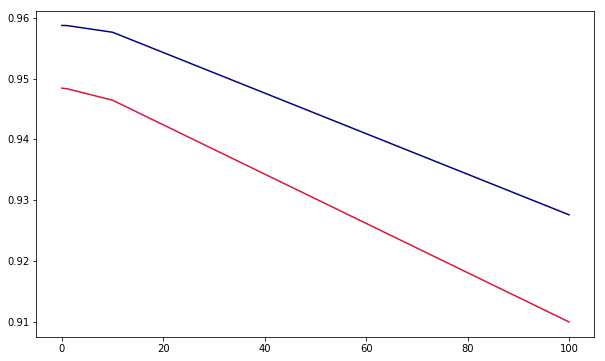

In [370]:
r2_train = []
r2_test = []
alphas = [0.00001,0.0001, 0.001, 0.01, 1, 10, 100]

for a in alphas:
    rdg = Ridge(alpha=a, random_state=26)
    rdg.fit(Xs_train_lin, ys_train_lin)
    train_score = rdg.score(Xs_train_lin, ys_train_lin)
    r2_train.append(train_score)
    test_score = rdg.score(Xs_test_lin, ys_test_lin)
    r2_test.append(test_score)
    
fig = plt.figure(figsize=[10,6])
plt.plot(alphas, r2_train, color='darkblue', label='Training Score')
plt.plot(alphas, r2_test, color='crimson', label='Testing Score')
plt.show()

**Life Ladder dominates feature performance. Remove this feature and train/predict with same models**